# Setup & Initial Exploration
## Load dataset

In [1]:
import pandas as pd

df = pd.read_csv('dnd_monsters.csv')


## Preview Data

In [2]:
print(df.head())         # First five rows
print()
print(df.info())         # Data types and non-null counts
print()
print(df.shape)          # (rows, columns)


         name                                                url   cr  \
0      boggle                                                NaN  1/8   
1       camel   https://www.aidedd.org/dnd/monstres.php?vo=camel  1/8   
2  giant-crab  https://www.aidedd.org/dnd/monstres.php?vo=gia...  1/8   
3      bandit  https://www.aidedd.org/dnd/monstres.php?vo=bandit  1/8   
4     dolphin  https://www.aidedd.org/dnd/monstres.php?vo=dol...  1/8   

                  type    size  ac  hp speed                     align  \
0                  fey   Small  14  18   NaN           chaotic neutral   
1                beast   Large   9  15   NaN                 unaligned   
2                beast  Medium  15  13  swim                 unaligned   
3  humanoid (any race)  Medium  12  11   NaN  any non-lawful alignment   
4                beast  Medium  12  11  swim                 unaligned   

  legendary                    source   str   dex   con   int   wis   cha  
0       NaN  Volo's Guide to Monsters   

## Basic Stats for Numeric Fields

### Analysis: Summary Statistics
This section provides descriptive statistics for all numeric fields. These values help identify the range, central tendency, and spread of variables like HP, AC, and CR.

In [3]:
df.describe()     # Count, mean, std, min, max, quartiles


,ac,hp,str,dex,con,int,wis,cha
count,762.000000,762.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000
mean,14.577428,88.129921,15.091678,13.235543,15.375176,9.383639,12.176305,10.708039
std,3.140581,94.822305,6.164991,3.381919,4.230005,5.812228,3.395528,5.634910
min,0.000000,0.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000
25%,12.000000,22.000000,11.000000,11.000000,12.000000,4.000000,10.000000,6.000000
50%,14.000000,58.000000,15.000000,14.000000,15.000000,10.000000,12.000000,10.000000
75%,17.000000,126.000000,19.000000,15.000000,18.000000,13.000000,14.000000,15.000000
max,25.000000,676.000000,30.000000,28.000000,30.000000,27.000000,27.000000,30.000000


### Analysis: Missing Values
This diagnostic shows how much data is missing in each column. It informs whether columns need to be dropped, filled, or imputed during preprocessing.

In [4]:
print(df.isnull().sum())         # Total missing per column
print(df.isnull().mean())        # Percentage of missing values


name           0
url          361
cr             0
type           0
size           0
ac             0
hp             0
speed        514
align          0
legendary    697
source         0
str           53
dex           53
con           53
int           53
wis           53
cha           53
dtype: int64
name         0.000000
url          0.473753
cr           0.000000
type         0.000000
size         0.000000
ac           0.000000
hp           0.000000
speed        0.674541
align        0.000000
legendary    0.914698
source       0.000000
str          0.069554
dex          0.069554
con          0.069554
int          0.069554
wis          0.069554
cha          0.069554
dtype: float64


## Check for Unique Values (Categorical Insight)

### Analysis: Unique Monster Types
Examining the diversity of monster types in the dataset. This helps us understand the categorical structure and plan comparisons across types.

In [5]:
print(df['type'].unique())           # Unique monster types
print(df['type'].value_counts())     # Frequency of types


['fey' 'beast' 'humanoid (any race)' 'humanoid (merfolk)' 'aberration'
 'fiend (demon)' 'monstrosity' 'humanoid (xvart)' 'humanoid (kobold)'
 'construct' 'plant' 'undead' 'humanoid (dwarf)' 'elemental'
 'swarm of Tiny beasts' 'humanoid (tabaxi)' 'humanoid (tortle)'
 'humanoid (kuo-toa)' 'ooze' 'humanoid (aarakocra)' 'humanoid (derro)'
 'humanoid (elf)' 'humanoid (kenku)' 'humanoid (troglodyte)'
 'humanoid (bullywug)' 'humanoid (grimlock)' 'humanoid (grung)'
 'humanoid (human)' 'humanoid (goblinoid)' 'dragon' 'humanoid (firenewt)'
 'humanoid (gnoll)' 'humanoid (lizardfolk)' 'humanoid (sahuagin)'
 'humanoid (shapechanger)' 'humanoid' 'humanoid (gnome)' 'humanoid (orc)'
 'fiend (devil)' 'monstrosity (titan)' 'fiend' 'construct (inevitable)'
 'fiend (demon, shapechanger)' 'celestial (titan)' 'celestial'
 'humanoid (nagpa)' 'giant (storm giant)' 'humanoid (gith)'
 'undead (shapechanger)' 'giant (fire giant)' 'giant' 'undead (titan)'
 'fiend (yugoloth)' 'giant (frost giant)'
 'monstrosity (s

In [6]:
print(df['size'].value_counts())     # Frequency of sizes
print(df['cr'].sort_values().unique())  # Unique challenge ratings sorted


Medium        381
Large         195
Huge           69
Small          54
Tiny           38
Gargantuan     25
Name: size, dtype: int64
['0' '1' '1/2' '1/4' '1/8' '10' '11' '12' '13' '14' '15' '16' '17' '18'
 '19' '2' '20' '21' '22' '23' '24' '25' '26' '3' '30' '4' '5' '6' '7' '8'
 '9']


In [7]:
print(df['cr'].value_counts().sort_index())
print(df['ac'].value_counts().sort_index())


0      56
1      65
1/2    50
1/4    63
1/8    29
10     22
11     18
12     15
13     20
14     11
15      9
16     12
17     10
18      6
19      4
2      85
20      8
21      8
22      4
23     11
24      4
25      1
26      3
3      54
30      2
4      37
5      57
6      25
7      27
8      22
9      24
Name: cr, dtype: int64
0       1
5       3
6       2
7       3
8       6
9       7
10     26
11     46
12    124
13    102
14     76
15     88
16     63
17     66
18     67
19     38
20     20
21      9
22     12
24      1
25      2
Name: ac, dtype: int64


# Data Cleaning
## Convert fractional ACs to decimal

In [8]:
from fractions import Fraction


In [9]:
def convert_to_float(val):
    try:
        return float(val)
    except ValueError:
        try:
            return float(Fraction(val))
        except:
            return None  # or np.nan if using NumPy


In [10]:
df['cr'] = df['cr'].apply(convert_to_float)


## Splitting Subtypes From Types

In [11]:
def split_types(val):
    if '(' in val:
        t, st = val.split('(')
        t = t.strip()
        st = st.strip(')')
    else:
        t = val
        st = 'none'
    return t, st

print(split_types('humanoid (any race)'))
print(split_types('beast'))

('humanoid', 'any race')
('beast', 'none')


In [12]:
# Use regex to extract main type and optional subtype
df[['type_main', 'type_subtype']] = df['type'].str.extract(r'^([^\(]+)\s*(?:\(([^)]+)\))?$')

# Strip whitespace
df['type_main'] = df['type_main'].str.strip()
df['type_subtype'] = df['type_subtype'].str.strip()


## One-hot Encode the Legendary Column 

In [13]:
df['is_legendary'] = df['legendary'].notnull().astype(int)
df['is_legendary']

0      0
1      0
2      0
3      0
4      0
      ..
757    0
758    0
759    0
760    0
761    0
Name: is_legendary, Length: 762, dtype: int64

# Exploratory Data Analysis
## Summarizing the Key Variable

In [14]:

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [15]:
def fit_model(df, x_col, y_col, model='linear'):
    """
    Fits a regression model (linear, quadratic, or exponential) and returns:
    - the model coefficients (tuple)
    - the equation string
    - the R² score (coefficient of determination)
    """
    # Drop missing values
    data = df[[x_col, y_col]].dropna()
    x = data[x_col].values
    y = data[y_col].values

    if model == 'linear':
        m, b = np.polyfit(x, y, 1)
        y_pred = m * x + b
        ss_res = np.sum((y - y_pred) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        r2 = 1 - ss_res / ss_tot
        eq = f"y = {m:.3f}x + {b:.3f}"
        return (m, b), eq, r2

    elif model == 'quadratic':
        a, b, c = np.polyfit(x, y, 2)
        y_pred = a * x**2 + b * x + c
        ss_res = np.sum((y - y_pred) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        r2 = 1 - ss_res / ss_tot
        eq = f"y = {a:.3f}x² + {b:.3f}x + {c:.3f}"
        return (a, b, c), eq, r2

    elif model == 'exponential':
        # Remove zero or negative y values
        mask = y > 0
        x = x[mask]
        y = y[mask]
        log_y = np.log(y)
        b, log_a = np.polyfit(x, log_y, 1)
        a = np.exp(log_a)
        y_pred = a * np.exp(b * x)
        ss_res = np.sum((y - y_pred) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        r2 = 1 - ss_res / ss_tot
        eq = f"y = {a:.3f}e^({b:.3f}x)"
        return (a, b), eq, r2

    else:
        raise ValueError("Model must be 'linear', 'quadratic', or 'exponential'")

<AxesSubplot: xlabel='cr', ylabel='Count'>

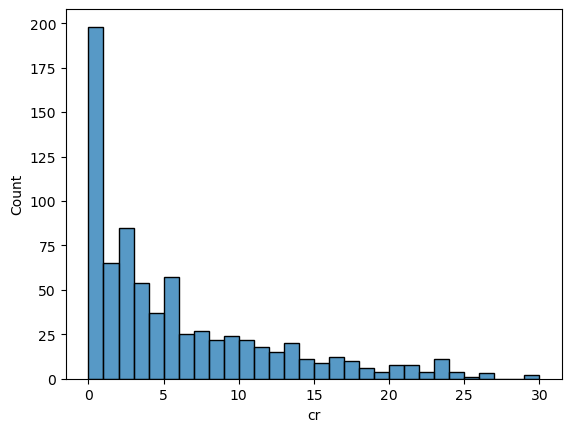

In [16]:
sns.histplot(df['cr'], binwidth=1)


## Visualization: Challenge Rating vs Attributes
These boxplots illustrate how various attributes are distributed across CRs. It highlights trends, variability, and outliers that could affect threat estimation.

### CR vs HP

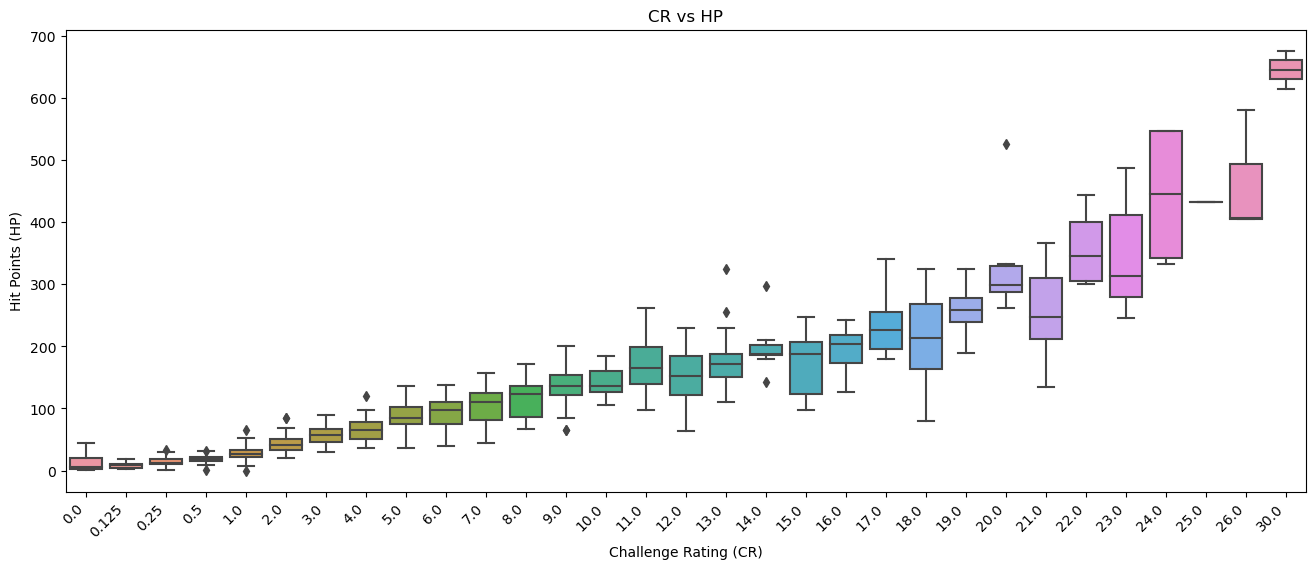

In [17]:
plt.figure(figsize=(16, 6))  # wider figure
sns.boxplot(x='cr', y='hp', data=df)
plt.xticks(rotation=45, ha='right')  # rotate for readability
plt.xlabel('Challenge Rating (CR)')
plt.ylabel('Hit Points (HP)')
plt.title('CR vs HP')
plt.show()


In [18]:
df.groupby('cr')['hp'].describe()


,count,mean,std,min,25%,50%,75%,max
cr,,,,,,,,
0.000,56.0,11.982143,12.103329,1.0,2.00,6.0,19.75,45.0
0.125,29.0,8.482759,3.670546,2.0,5.00,9.0,11.00,18.0
0.250,63.0,14.984127,6.287448,1.0,11.00,13.0,19.00,33.0
0.500,50.0,18.980000,5.593327,1.0,16.00,19.0,22.00,32.0
1.000,65.0,27.846154,11.200210,0.0,22.00,27.0,34.00,65.0
2.000,85.0,43.023529,13.553225,21.0,33.00,42.0,51.00,85.0
3.000,54.0,56.962963,14.989258,30.0,46.00,58.0,66.75,90.0
4.000,37.0,67.405405,19.619236,36.0,51.00,66.0,78.00,120.0
5.000,57.0,88.315789,23.736017,36.0,75.00,85.0,102.00,136.0


Linear Model
y = 14.050x + 10.205
R² = 0.858

Quadratic Model
y = 0.236x² + 9.381x + 19.651
R² = 0.871



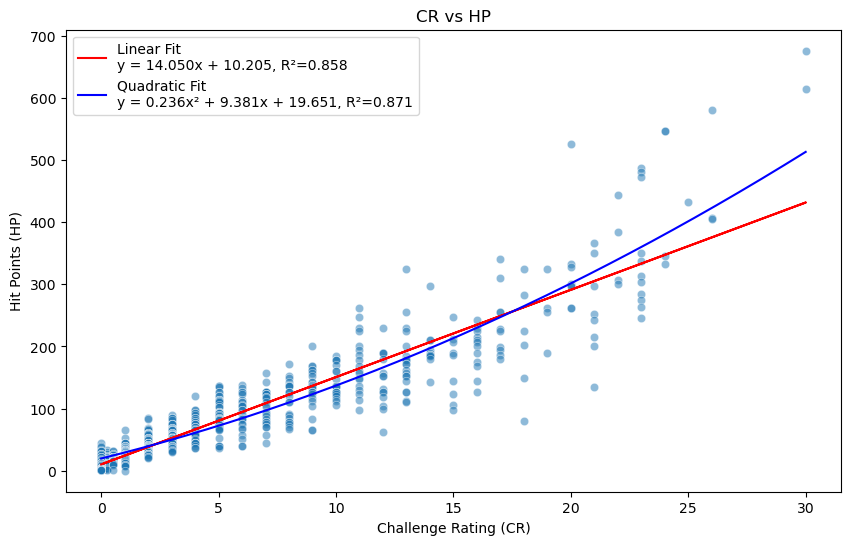

In [19]:
x = df['cr']
y = df['hp']

print('Linear Model')
(slope, intercept), eq, r2 = fit_model(df, 'cr', 'hp')
print(eq)
print(f"R² = {r2:.3f}", end='\n\n')

print('Quadratic Model')
quad_params, quad_eq, quad_r2 = fit_model(df, 'cr', 'hp', model='quadratic')
print(quad_eq)
print(f"R² = {quad_r2:.3f}", end='\n\n')


# Filter and sort x values for smooth curves
x_vals = np.linspace(df['cr'].min(), df['cr'].max(), 500)

# Quadratic predictions
a, b, c = quad_params
y_quad = a * x_vals**2 + b * x_vals + c


plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=y, alpha=0.5)
plt.plot(x, slope * x + intercept, color='red', label=f'Linear Fit\n{eq}, R²={r2:.3f}')
plt.plot(x_vals, y_quad, color='blue', label=f'Quadratic Fit\n{quad_eq}, R²={quad_r2:.3f}')
plt.legend()
plt.xlabel('Challenge Rating (CR)')
plt.ylabel('Hit Points (HP)')
plt.title('CR vs HP')
plt.show()

### CR vs AC

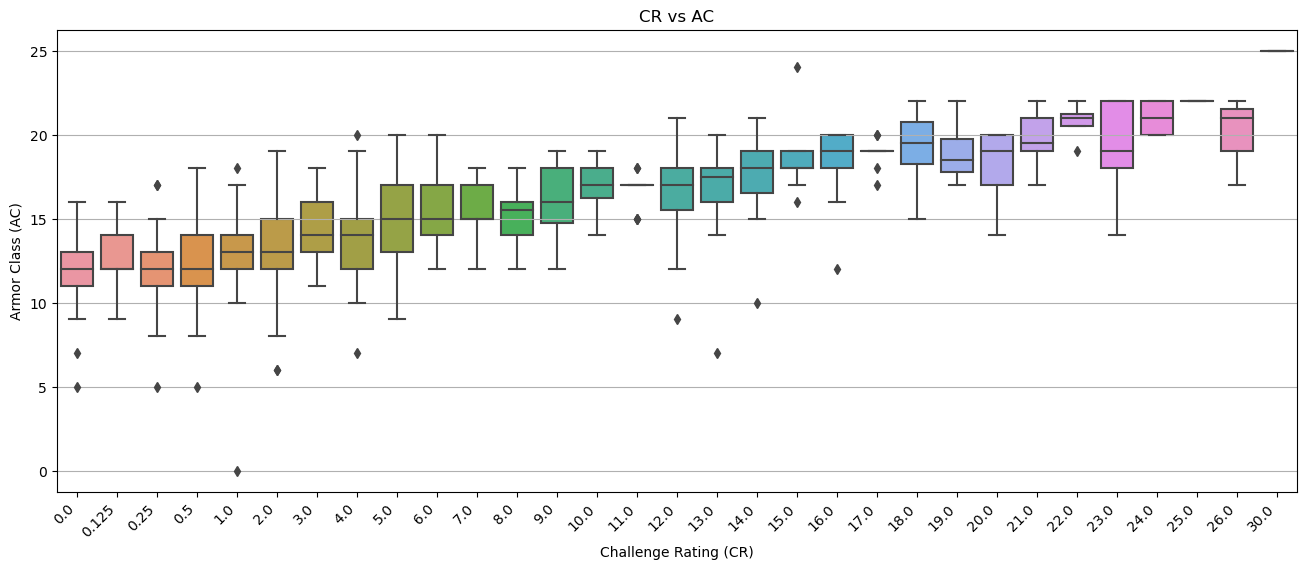

In [20]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='cr', y='ac', data=df)
plt.grid(visible=True, axis='y')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Challenge Rating (CR)')
plt.ylabel('Armor Class (AC)')
plt.title('CR vs AC')
plt.show()


In [21]:
df.groupby('cr')['ac'].describe()


,count,mean,std,min,25%,50%,75%,max
cr,,,,,,,,
0.000,56.0,12.125000,2.098159,5.0,11.00,12.0,13.00,16.0
0.125,29.0,12.517241,1.844310,9.0,12.00,12.0,14.00,16.0
0.250,63.0,12.079365,2.073656,5.0,11.00,12.0,13.00,17.0
0.500,50.0,12.540000,2.260666,5.0,11.00,12.0,14.00,18.0
1.000,65.0,12.938462,2.461433,0.0,12.00,13.0,14.00,18.0
2.000,85.0,13.482353,2.447602,6.0,12.00,13.0,15.00,19.0
3.000,54.0,14.203704,1.897164,11.0,13.00,14.0,16.00,18.0
4.000,37.0,13.891892,2.525248,7.0,12.00,14.0,15.00,20.0
5.000,57.0,14.947368,2.559444,9.0,13.00,15.0,17.00,20.0


Linear Model
y = 0.352x + 12.623
R² = 0.492

Quadratic Model
y = -0.005x² + 0.459x + 12.407
R² = 0.498



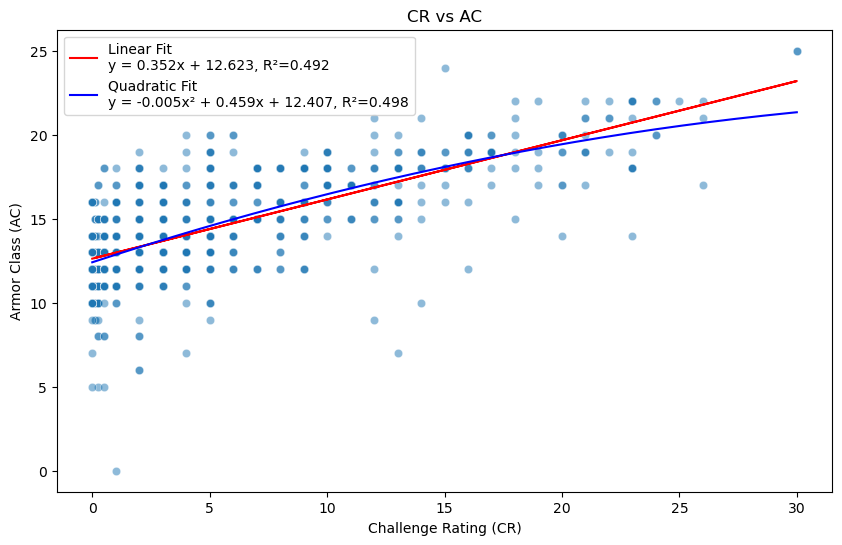

In [22]:
x = df['cr']
y = df['ac']

print('Linear Model')
(slope, intercept), eq, r2 = fit_model(df, 'cr', 'ac')
print(eq)
print(f"R² = {r2:.3f}", end='\n\n')

print('Quadratic Model')
quad_params, quad_eq, quad_r2 = fit_model(df, 'cr', 'ac', model='quadratic')
print(quad_eq)
print(f"R² = {quad_r2:.3f}", end='\n\n')

# Filter and sort x values for smooth curves
x_vals = np.linspace(df['cr'].min(), df['cr'].max(), 500)

# Quadratic predictions
a, b, c = quad_params
y_quad = a * x_vals**2 + b * x_vals + c


plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=y, alpha=0.5)
plt.plot(x, slope * x + intercept, color='red', label=f'Linear Fit\n{eq}, R²={r2:.3f}')
plt.plot(x_vals, y_quad, color='blue', label=f'Quadratic Fit\n{quad_eq}, R²={quad_r2:.3f}')
plt.legend()
plt.xlabel('Challenge Rating (CR)')
plt.ylabel('Armor Class (AC)')
plt.title('CR vs AC')
plt.show()

### CR vs STR

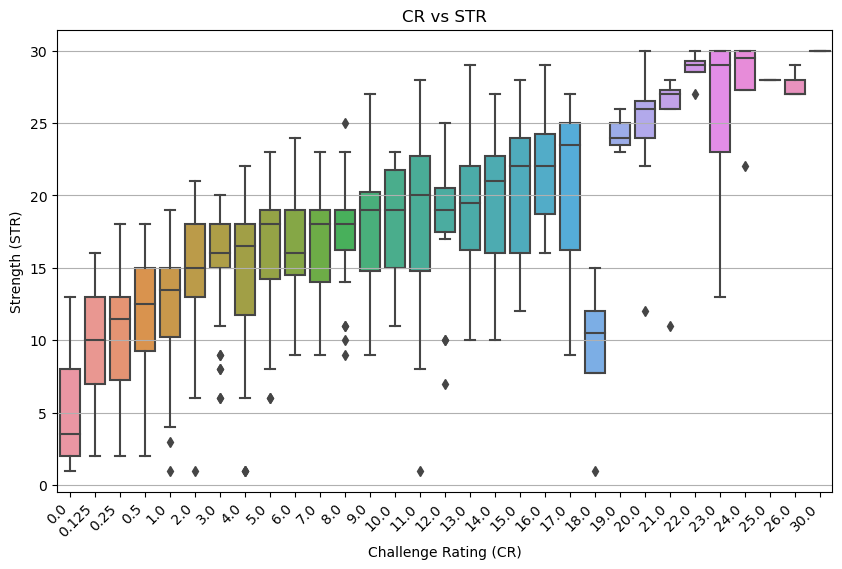

In [23]:
plt.figure(figsize=(10,6))
sns.boxplot(x='cr', y='str', data=df)
plt.grid(visible=True, axis='y')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Challenge Rating (CR)')
plt.ylabel('Strength (STR)')
plt.title('CR vs STR')
plt.show()

In [24]:
df.groupby('cr')['str'].describe()


,count,mean,std,min,25%,50%,75%,max
cr,,,,,,,,
0.000,32.0,5.062500,3.697754,1.0,2.00,3.5,8.00,13.0
0.125,29.0,9.620690,3.849061,2.0,7.00,10.0,13.00,16.0
0.250,62.0,10.693548,3.826520,2.0,7.25,11.5,13.00,18.0
0.500,46.0,11.652174,4.321612,2.0,9.25,12.5,15.00,18.0
1.000,62.0,12.516129,4.051885,1.0,10.25,13.5,15.00,19.0
2.000,81.0,14.740741,3.794001,1.0,13.00,15.0,18.00,21.0
3.000,54.0,15.222222,3.553721,6.0,15.00,16.0,18.00,20.0
4.000,36.0,14.416667,5.798399,1.0,11.75,16.5,18.00,22.0
5.000,54.0,16.055556,4.293113,6.0,14.25,18.0,19.00,23.0


Linear Model
y = 0.636x + 11.531
R² = 0.399

Quadratic Model
y = -0.012x² + 0.878x + 11.024
R² = 0.406



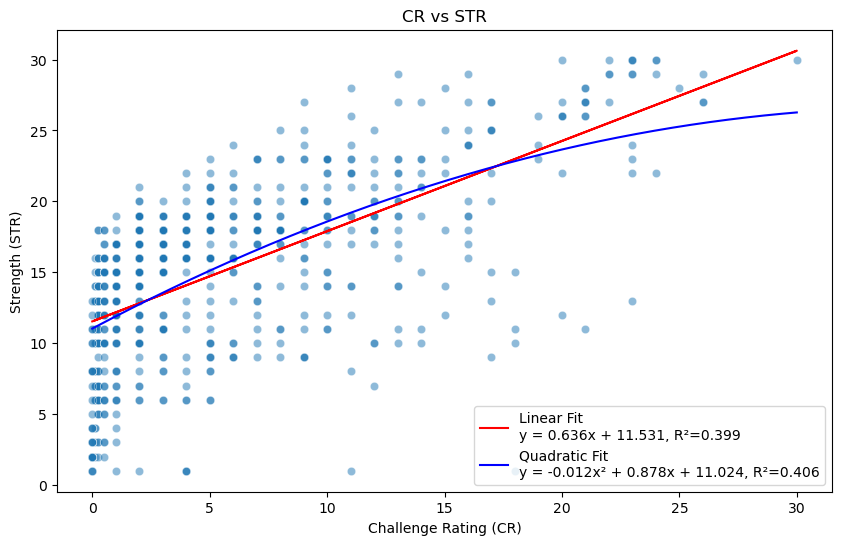

In [25]:
x = df['cr']
y = df['str']

print('Linear Model')
(slope, intercept), eq, r2 = fit_model(df, 'cr', 'str')
print(eq)
print(f"R² = {r2:.3f}", end='\n\n')

print('Quadratic Model')
quad_params, quad_eq, quad_r2 = fit_model(df, 'cr', 'str', model='quadratic')
print(quad_eq)
print(f"R² = {quad_r2:.3f}", end='\n\n')

# Filter and sort x values for smooth curves
x_vals = np.linspace(df['cr'].min(), df['cr'].max(), 500)

# Quadratic predictions
a, b, c = quad_params
y_quad = a * x_vals**2 + b * x_vals + c


plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=y, alpha=0.5)
plt.plot(x, slope * x + intercept, color='red', label=f'Linear Fit\n{eq}, R²={r2:.3f}')
plt.plot(x_vals, y_quad, color='blue', label=f'Quadratic Fit\n{quad_eq}, R²={quad_r2:.3f}')
plt.legend()
plt.xlabel('Challenge Rating (CR)')
plt.ylabel('Strength (STR)')
plt.title('CR vs STR')
plt.show()

### CR vs DEX

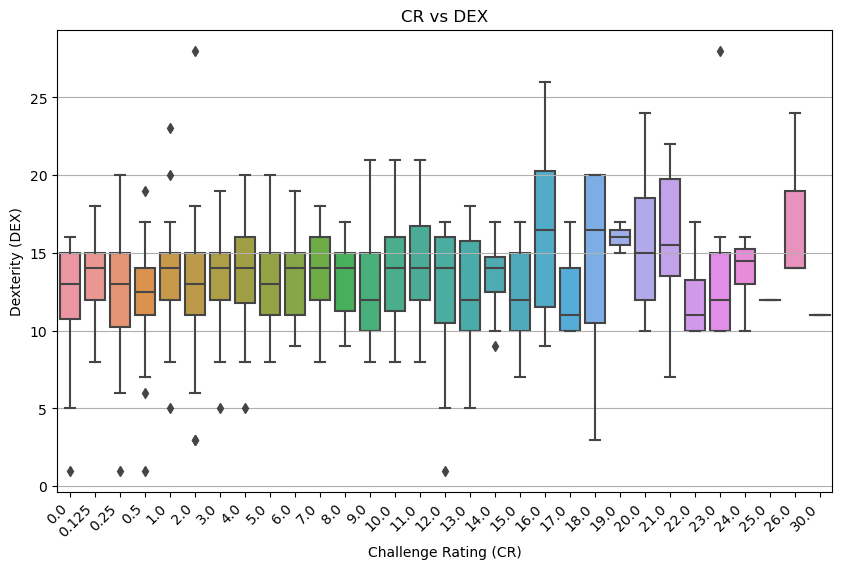

In [26]:
plt.figure(figsize=(10,6))
sns.boxplot(x='cr', y='dex', data=df)
plt.grid(visible=True, axis='y')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Challenge Rating (CR)')
plt.ylabel('Dexterity (DEX)')
plt.title('CR vs DEX')
plt.show()

In [27]:
df.groupby('cr')['dex'].describe()


,count,mean,std,min,25%,50%,75%,max
cr,,,,,,,,
0.000,32.0,12.312500,3.354703,1.0,10.75,13.0,15.00,16.0
0.125,29.0,13.517241,2.458523,8.0,12.00,14.0,15.00,18.0
0.250,62.0,12.709677,3.159099,1.0,10.25,13.0,15.00,20.0
0.500,46.0,12.326087,2.944331,1.0,11.00,12.5,14.00,19.0
1.000,62.0,13.709677,2.916247,5.0,12.00,14.0,15.00,23.0
2.000,81.0,12.604938,3.541465,3.0,11.00,13.0,15.00,28.0
3.000,54.0,13.388889,2.811141,5.0,12.00,14.0,15.00,19.0
4.000,36.0,13.527778,3.350788,5.0,11.75,14.0,16.00,20.0
5.000,54.0,13.092593,3.157910,8.0,11.00,13.0,15.00,20.0


Linear Model
y = 0.066x + 12.869
R² = 0.014

Quadratic Model
y = 0.000x² + 0.062x + 12.876
R² = 0.014



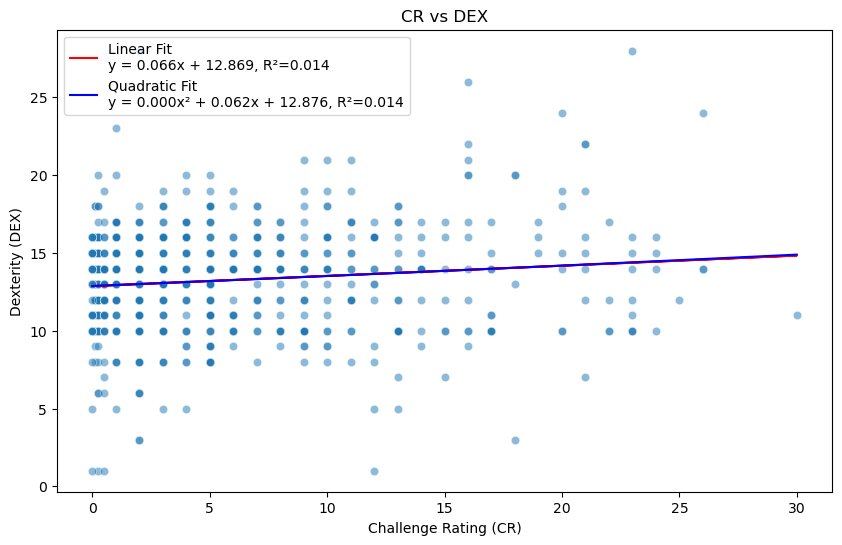

In [28]:
x = df['cr']
y = df['dex']

print('Linear Model')
(slope, intercept), eq, r2 = fit_model(df, 'cr', 'dex')
print(eq)
print(f"R² = {r2:.3f}", end='\n\n')

print('Quadratic Model')
quad_params, quad_eq, quad_r2 = fit_model(df, 'cr', 'dex', model='quadratic')
print(quad_eq)
print(f"R² = {quad_r2:.3f}", end='\n\n')

# Filter and sort x values for smooth curves
x_vals = np.linspace(df['cr'].min(), df['cr'].max(), 500)

# Quadratic predictions
a, b, c = quad_params
y_quad = a * x_vals**2 + b * x_vals + c


plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=y, alpha=0.5)
plt.plot(x, slope * x + intercept, color='red', label=f'Linear Fit\n{eq}, R²={r2:.3f}')
plt.plot(x_vals, y_quad, color='blue', label=f'Quadratic Fit\n{quad_eq}, R²={quad_r2:.3f}')
plt.legend()
plt.xlabel('Challenge Rating (CR)')
plt.ylabel('Dexterity (DEX)')
plt.title('CR vs DEX')
plt.show()

### CR vs CON

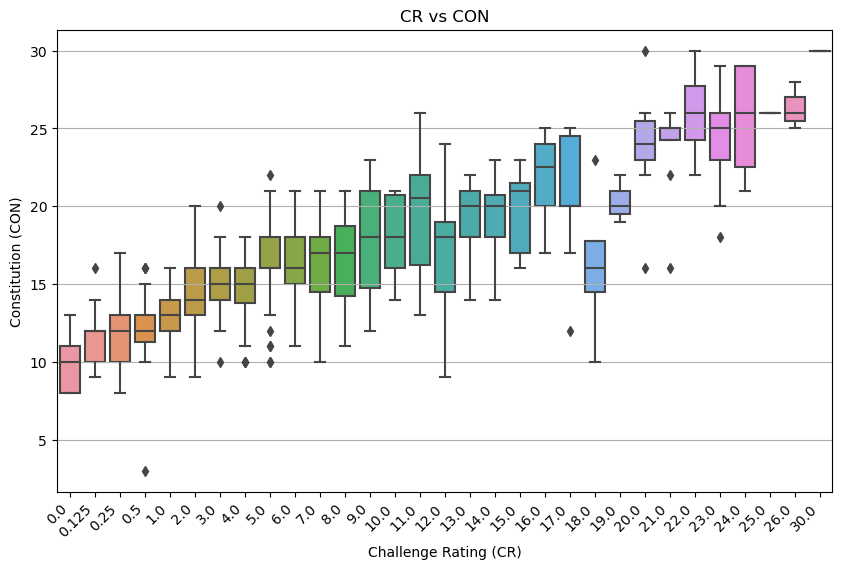

In [29]:
plt.figure(figsize=(10,6))
sns.boxplot(x='cr', y='con', data=df)
plt.grid(visible=True, axis='y')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Challenge Rating (CR)')
plt.ylabel('Constitution (CON)')
plt.title('CR vs CON')
plt.show()

In [30]:
df.groupby('cr')['con'].describe()


,count,mean,std,min,25%,50%,75%,max
cr,,,,,,,,
0.000,32.0,9.937500,1.479701,8.0,8.00,10.0,11.00,13.0
0.125,29.0,11.586207,1.500410,9.0,10.00,12.0,12.00,16.0
0.250,62.0,11.870968,1.920416,8.0,10.00,12.0,13.00,17.0
0.500,46.0,12.217391,2.096696,3.0,11.25,12.0,13.00,16.0
1.000,62.0,12.661290,1.629075,9.0,12.00,13.0,14.00,16.0
2.000,81.0,14.222222,2.133073,9.0,13.00,14.0,16.00,20.0
3.000,54.0,14.833333,1.830043,10.0,14.00,15.0,16.00,20.0
4.000,36.0,14.694444,2.201551,10.0,13.75,15.0,16.00,18.0
5.000,54.0,16.407407,2.695339,10.0,16.00,16.0,18.00,22.0


Linear Model
y = 0.544x + 12.332
R² = 0.619

Quadratic Model
y = -0.007x² + 0.678x + 12.051
R² = 0.624



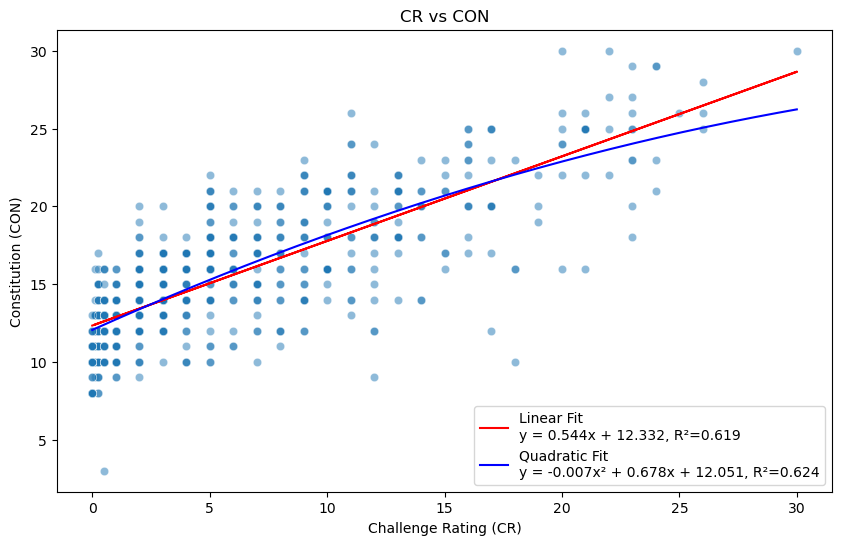

In [31]:
x = df['cr']
y = df['con']

print('Linear Model')
(slope, intercept), eq, r2 = fit_model(df, 'cr', 'con')
print(eq)
print(f"R² = {r2:.3f}", end='\n\n')

print('Quadratic Model')
quad_params, quad_eq, quad_r2 = fit_model(df, 'cr', 'con', model='quadratic')
print(quad_eq)
print(f"R² = {quad_r2:.3f}", end='\n\n')

# Filter and sort x values for smooth curves
x_vals = np.linspace(df['cr'].min(), df['cr'].max(), 500)

# Quadratic predictions
a, b, c = quad_params
y_quad = a * x_vals**2 + b * x_vals + c


plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=y, alpha=0.5)
plt.plot(x, slope * x + intercept, color='red', label=f'Linear Fit\n{eq}, R²={r2:.3f}')
plt.plot(x_vals, y_quad, color='blue', label=f'Quadratic Fit\n{quad_eq}, R²={quad_r2:.3f}')
plt.legend()
plt.xlabel('Challenge Rating (CR)')
plt.ylabel('Constitution (CON)')
plt.title('CR vs CON')
plt.show()

### CR vs INT

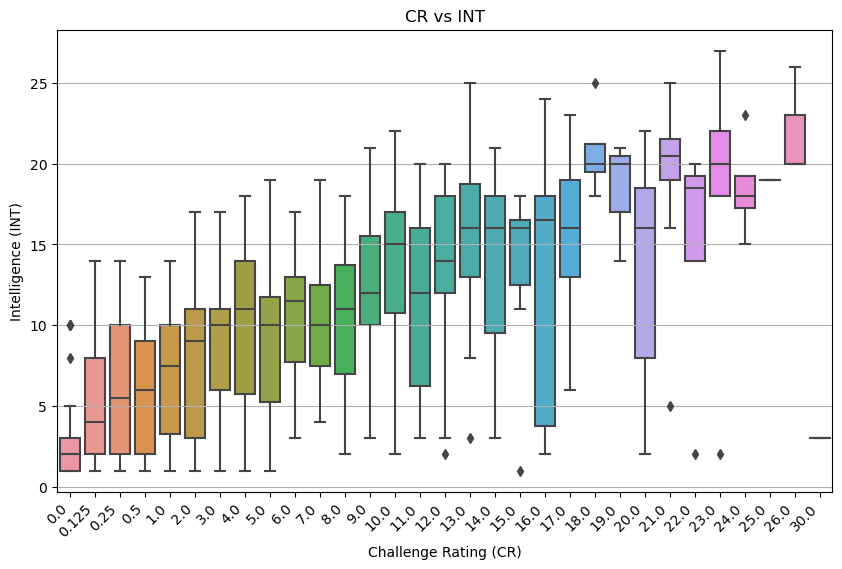

In [32]:
plt.figure(figsize=(10,6))
sns.boxplot(x='cr', y='int', data=df)
plt.grid(visible=True, axis='y')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Challenge Rating (CR)')
plt.ylabel('Intelligence (INT)')
plt.title('CR vs INT')
plt.show()

In [33]:
df.groupby('cr')['int'].describe()


,count,mean,std,min,25%,50%,75%,max
cr,,,,,,,,
0.000,32.0,2.937500,2.723109,1.0,1.00,2.0,3.00,10.0
0.125,29.0,5.310345,3.675240,1.0,2.00,4.0,8.00,14.0
0.250,62.0,6.129032,4.166549,1.0,2.00,5.5,10.00,14.0
0.500,46.0,5.630435,3.923483,1.0,2.00,6.0,9.00,13.0
1.000,62.0,7.145161,3.929071,1.0,3.25,7.5,10.00,14.0
2.000,81.0,7.666667,4.367494,1.0,3.00,9.0,11.00,17.0
3.000,54.0,8.777778,3.993706,1.0,6.00,10.0,11.00,17.0
4.000,36.0,10.194444,4.725732,1.0,5.75,11.0,14.00,18.0
5.000,54.0,9.018519,4.652006,1.0,5.25,10.0,11.75,19.0


Linear Model
y = 0.557x + 6.269
R² = 0.343

Quadratic Model
y = -0.017x² + 0.885x + 5.582
R² = 0.359



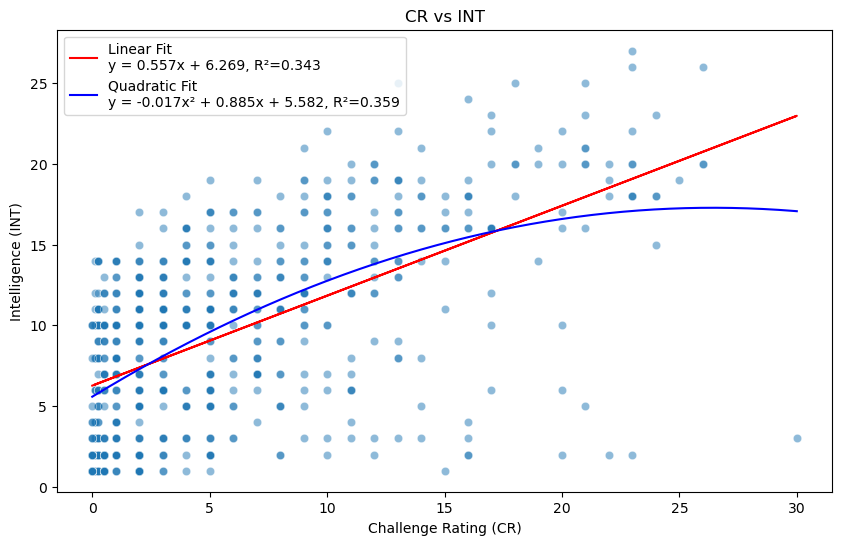

In [34]:
x = df['cr']
y = df['int']

print('Linear Model')
(slope, intercept), eq, r2 = fit_model(df, 'cr', 'int')
print(eq)
print(f"R² = {r2:.3f}", end='\n\n')

print('Quadratic Model')
quad_params, quad_eq, quad_r2 = fit_model(df, 'cr', 'int', model='quadratic')
print(quad_eq)
print(f"R² = {quad_r2:.3f}", end='\n\n')

# Filter and sort x values for smooth curves
x_vals = np.linspace(df['cr'].min(), df['cr'].max(), 500)

# Quadratic predictions
a, b, c = quad_params
y_quad = a * x_vals**2 + b * x_vals + c


plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=y, alpha=0.5)
plt.plot(x, slope * x + intercept, color='red', label=f'Linear Fit\n{eq}, R²={r2:.3f}')
plt.plot(x_vals, y_quad, color='blue', label=f'Quadratic Fit\n{quad_eq}, R²={quad_r2:.3f}')
plt.legend()
plt.xlabel('Challenge Rating (CR)')
plt.ylabel('Intelligence (INT)')
plt.title('CR vs INT')
plt.show()

### CR vs WIS

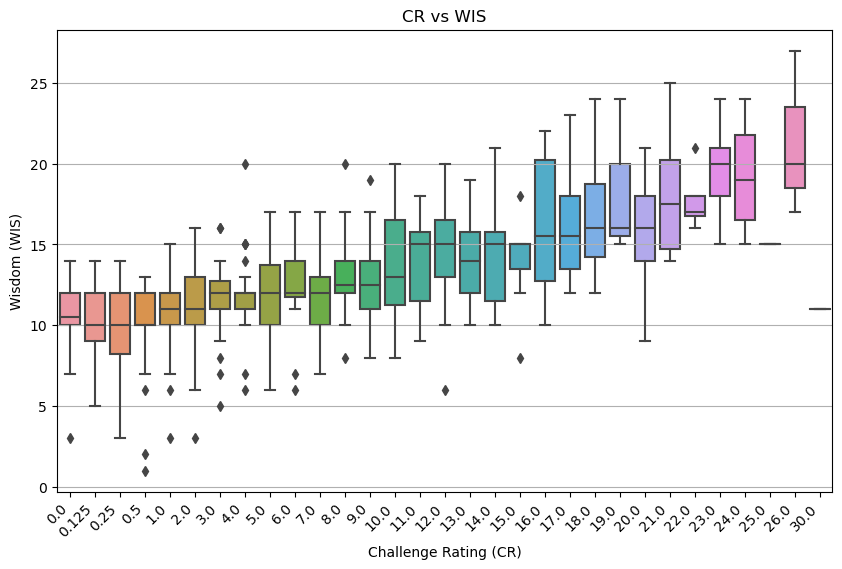

In [35]:
plt.figure(figsize=(10,6))
sns.boxplot(x='cr', y='wis', data=df)
plt.grid(visible=True, axis='y')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Challenge Rating (CR)')
plt.ylabel('Wisdom (WIS)')
plt.title('CR vs WIS')
plt.show()

In [36]:
df.groupby('cr')['wis'].describe()


,count,mean,std,min,25%,50%,75%,max
cr,,,,,,,,
0.000,32.0,10.437500,2.327085,3.0,10.00,10.5,12.00,14.0
0.125,29.0,10.310345,2.189316,5.0,9.00,10.0,12.00,14.0
0.250,62.0,9.951613,2.511791,3.0,8.25,10.0,12.00,14.0
0.500,46.0,10.130435,2.543914,1.0,10.00,10.0,12.00,13.0
1.000,62.0,10.870968,2.228606,3.0,10.00,11.0,12.00,15.0
2.000,81.0,11.358025,2.451064,3.0,10.00,11.0,13.00,16.0
3.000,54.0,11.574074,1.977247,5.0,11.00,12.0,12.75,16.0
4.000,36.0,11.833333,2.286607,6.0,11.00,12.0,12.00,20.0
5.000,54.0,11.703704,2.376216,6.0,10.00,12.0,13.75,17.0


Linear Model
y = 0.342x + 10.263
R² = 0.379

Quadratic Model
y = 0.001x² + 0.320x + 10.309
R² = 0.380



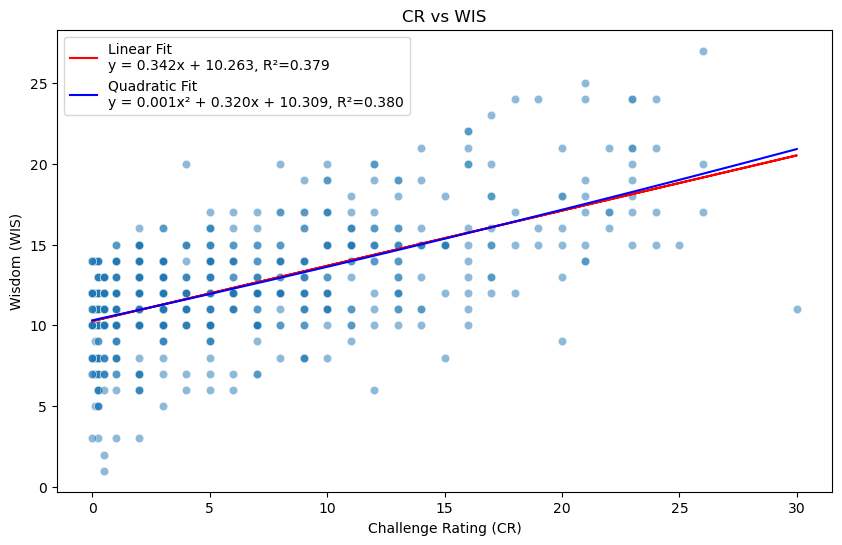

In [37]:
x = df['cr']
y = df['wis']

print('Linear Model')
(slope, intercept), eq, r2 = fit_model(df, 'cr', 'wis')
print(eq)
print(f"R² = {r2:.3f}", end='\n\n')

print('Quadratic Model')
quad_params, quad_eq, quad_r2 = fit_model(df, 'cr', 'wis', model='quadratic')
print(quad_eq)
print(f"R² = {quad_r2:.3f}", end='\n\n')

# Filter and sort x values for smooth curves
x_vals = np.linspace(df['cr'].min(), df['cr'].max(), 500)

# Quadratic predictions
a, b, c = quad_params
y_quad = a * x_vals**2 + b * x_vals + c


plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=y, alpha=0.5)
plt.plot(x, slope * x + intercept, color='red', label=f'Linear Fit\n{eq}, R²={r2:.3f}')
plt.plot(x_vals, y_quad, color='blue', label=f'Quadratic Fit\n{quad_eq}, R²={quad_r2:.3f}')
plt.legend()
plt.xlabel('Challenge Rating (CR)')
plt.ylabel('Wisdom (WIS)')
plt.title('CR vs WIS')
plt.show()

### CR vs CHA

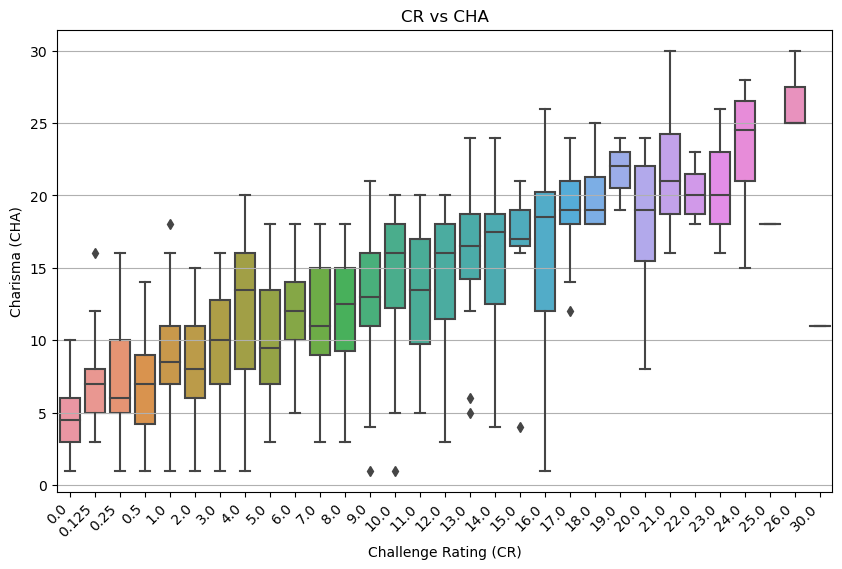

In [38]:
plt.figure(figsize=(10,6))
sns.boxplot(x='cr', y='cha', data=df)
plt.grid(visible=True, axis='y')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Challenge Rating (CR)')
plt.ylabel('Charisma (CHA)')
plt.title('CR vs CHA')
plt.show()

In [39]:
df.groupby('cr')['cha'].describe()


,count,mean,std,min,25%,50%,75%,max
cr,,,,,,,,
0.000,32.0,4.593750,2.092373,1.0,3.00,4.5,6.00,10.0
0.125,29.0,6.827586,3.059750,3.0,5.00,7.0,8.00,16.0
0.250,62.0,6.951613,3.331063,1.0,5.00,6.0,10.00,16.0
0.500,46.0,6.565217,3.270421,1.0,4.25,7.0,9.00,14.0
1.000,62.0,8.903226,3.970009,1.0,7.00,8.5,11.00,18.0
2.000,81.0,8.543210,3.398711,1.0,6.00,8.0,11.00,15.0
3.000,54.0,9.851852,3.773829,1.0,7.00,10.0,12.75,16.0
4.000,36.0,12.000000,4.968472,1.0,8.00,13.5,16.00,20.0
5.000,54.0,9.944444,4.150093,3.0,7.00,9.5,13.50,18.0


Linear Model
y = 0.624x + 7.214
R² = 0.460

Quadratic Model
y = -0.008x² + 0.780x + 6.889
R² = 0.463



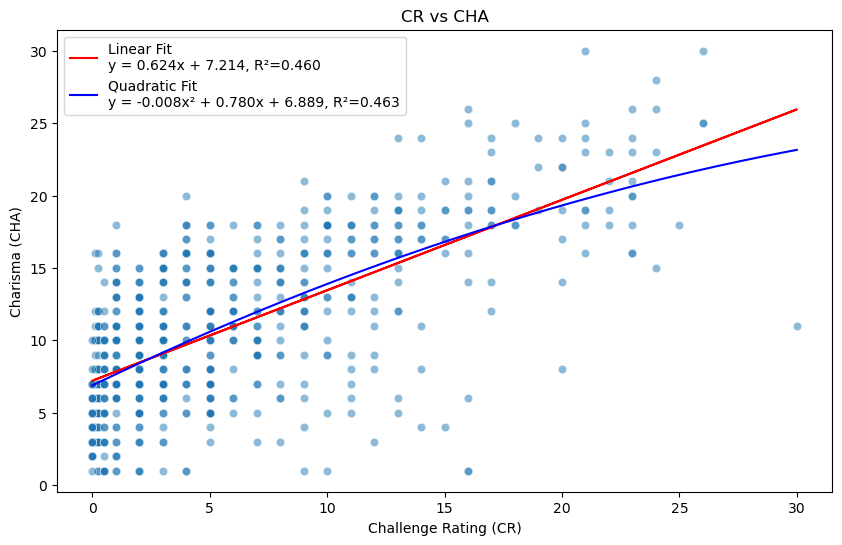

In [40]:
x = df['cr']
y = df['cha']

print('Linear Model')
(slope, intercept), eq, r2 = fit_model(df, 'cr', 'cha')
print(eq)
print(f"R² = {r2:.3f}", end='\n\n')

print('Quadratic Model')
quad_params, quad_eq, quad_r2 = fit_model(df, 'cr', 'cha', model='quadratic')
print(quad_eq)
print(f"R² = {quad_r2:.3f}", end='\n\n')

# Filter and sort x values for smooth curves
x_vals = np.linspace(df['cr'].min(), df['cr'].max(), 500)

# Quadratic predictions
a, b, c = quad_params
y_quad = a * x_vals**2 + b * x_vals + c


plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=y, alpha=0.5)
plt.plot(x, slope * x + intercept, color='red', label=f'Linear Fit\n{eq}, R²={r2:.3f}')
plt.plot(x_vals, y_quad, color='blue', label=f'Quadratic Fit\n{quad_eq}, R²={quad_r2:.3f}')
plt.legend()
plt.xlabel('Challenge Rating (CR)')
plt.ylabel('Charisma (CHA)')
plt.title('CR vs CHA')
plt.show()

### Stats By Monster Type

In [41]:
def plot_stats_by_type(df, group_col='type_main'):
    """
    Plots boxplots of ability scores grouped by a category (default: monster type).
    Expects columns: str, dex, con, int, wis, cha
    """
    stats = ['str', 'dex', 'con', 'int', 'wis', 'cha']
    
    # Create 6x1 grid of subplots
    fig, axes = plt.subplots(6, 1, figsize=(12, 36))  # 6 rows, 1 column

    
    for i, stat in enumerate(stats):
        ax = axes[i]
        sns.boxplot(x=group_col, y=stat, data=df, ax=ax)
        ax.set_title(f'{stat.upper()} by {group_col}')
        ax.set_xlabel('')
        ax.set_ylabel(stat.upper())
        ax.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

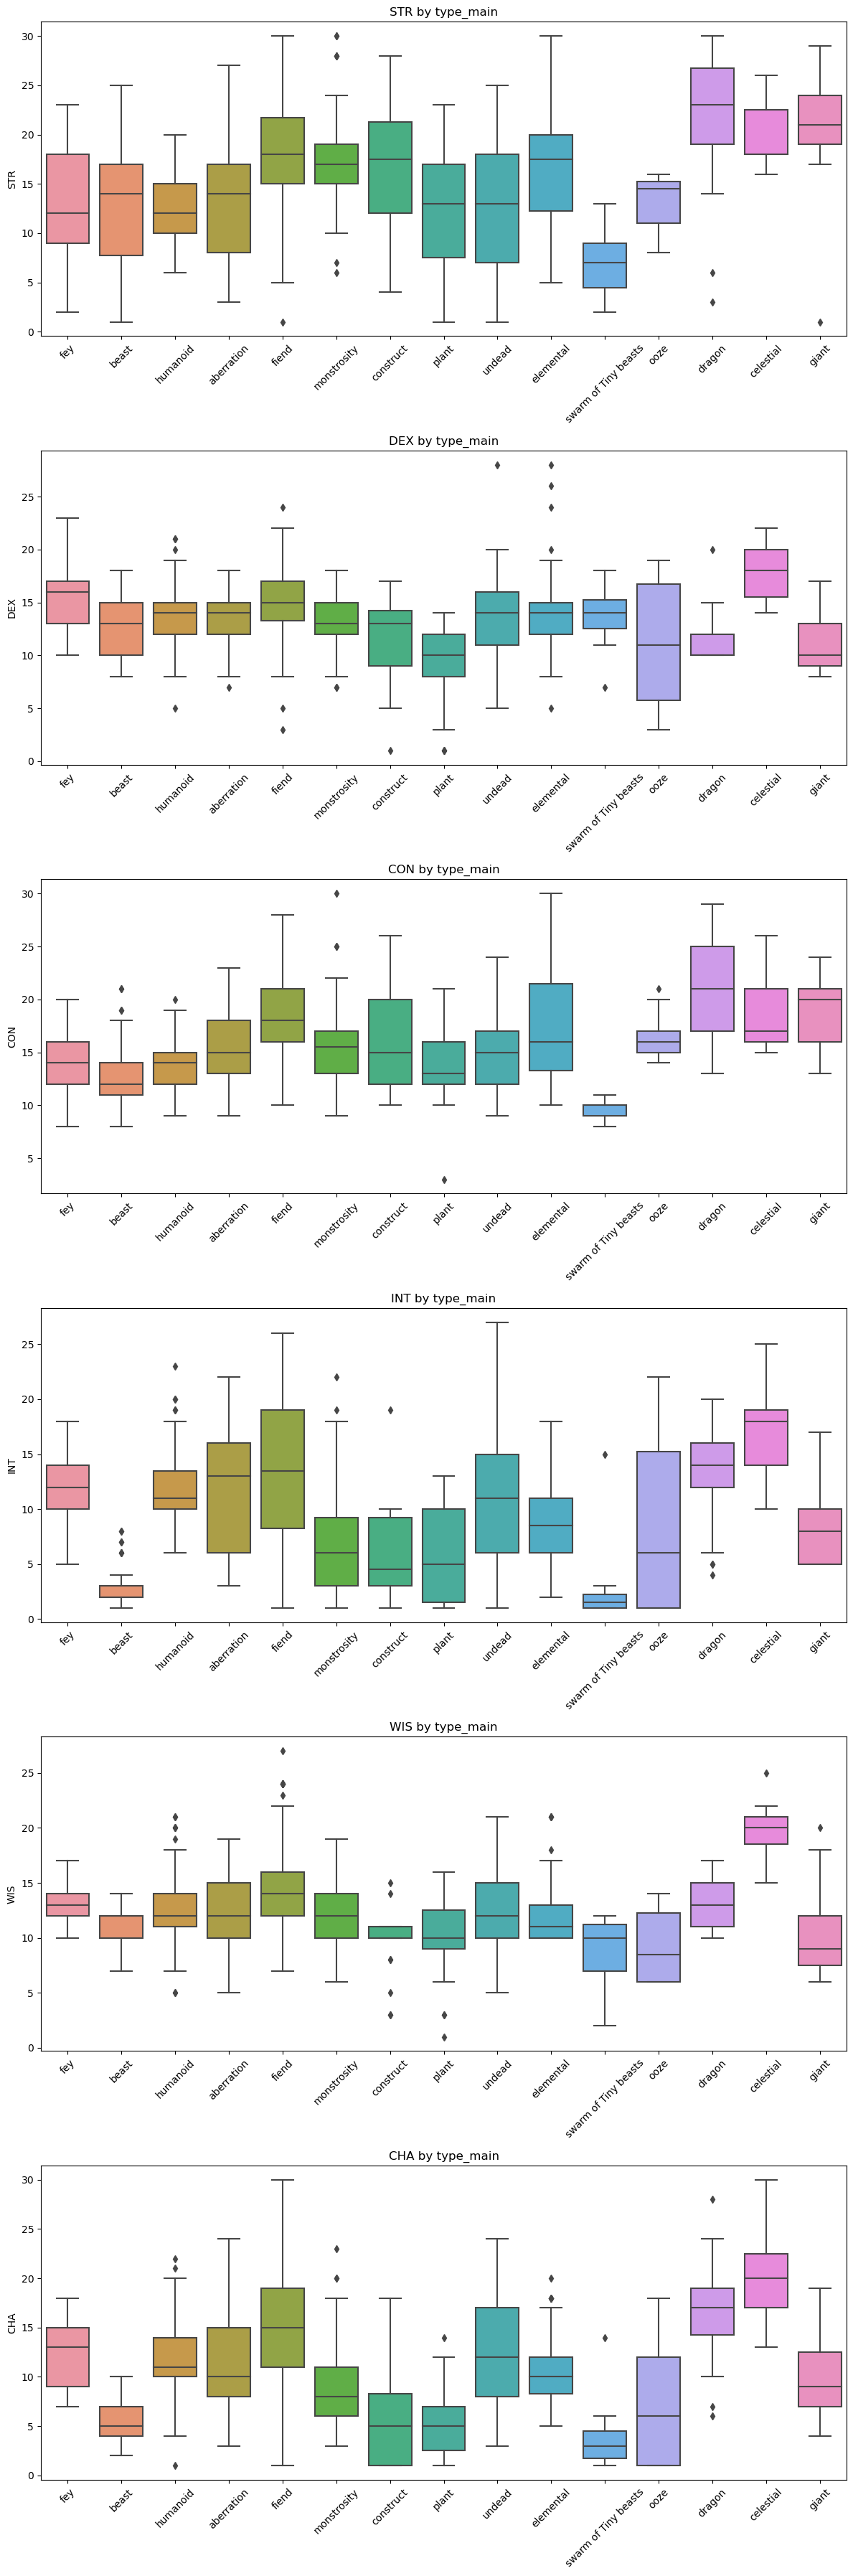

In [42]:
plot_stats_by_type(df)

# Feature Engineering
## Average Stat

<AxesSubplot: xlabel='avg_stat', ylabel='Count'>

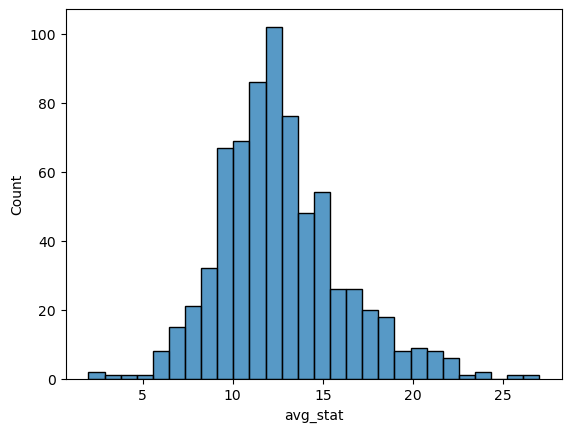

In [43]:
df['avg_stat'] = df[['str', 'dex', 'con', 'int', 'wis', 'cha']].mean(axis=1)


sns.histplot(df['avg_stat'])

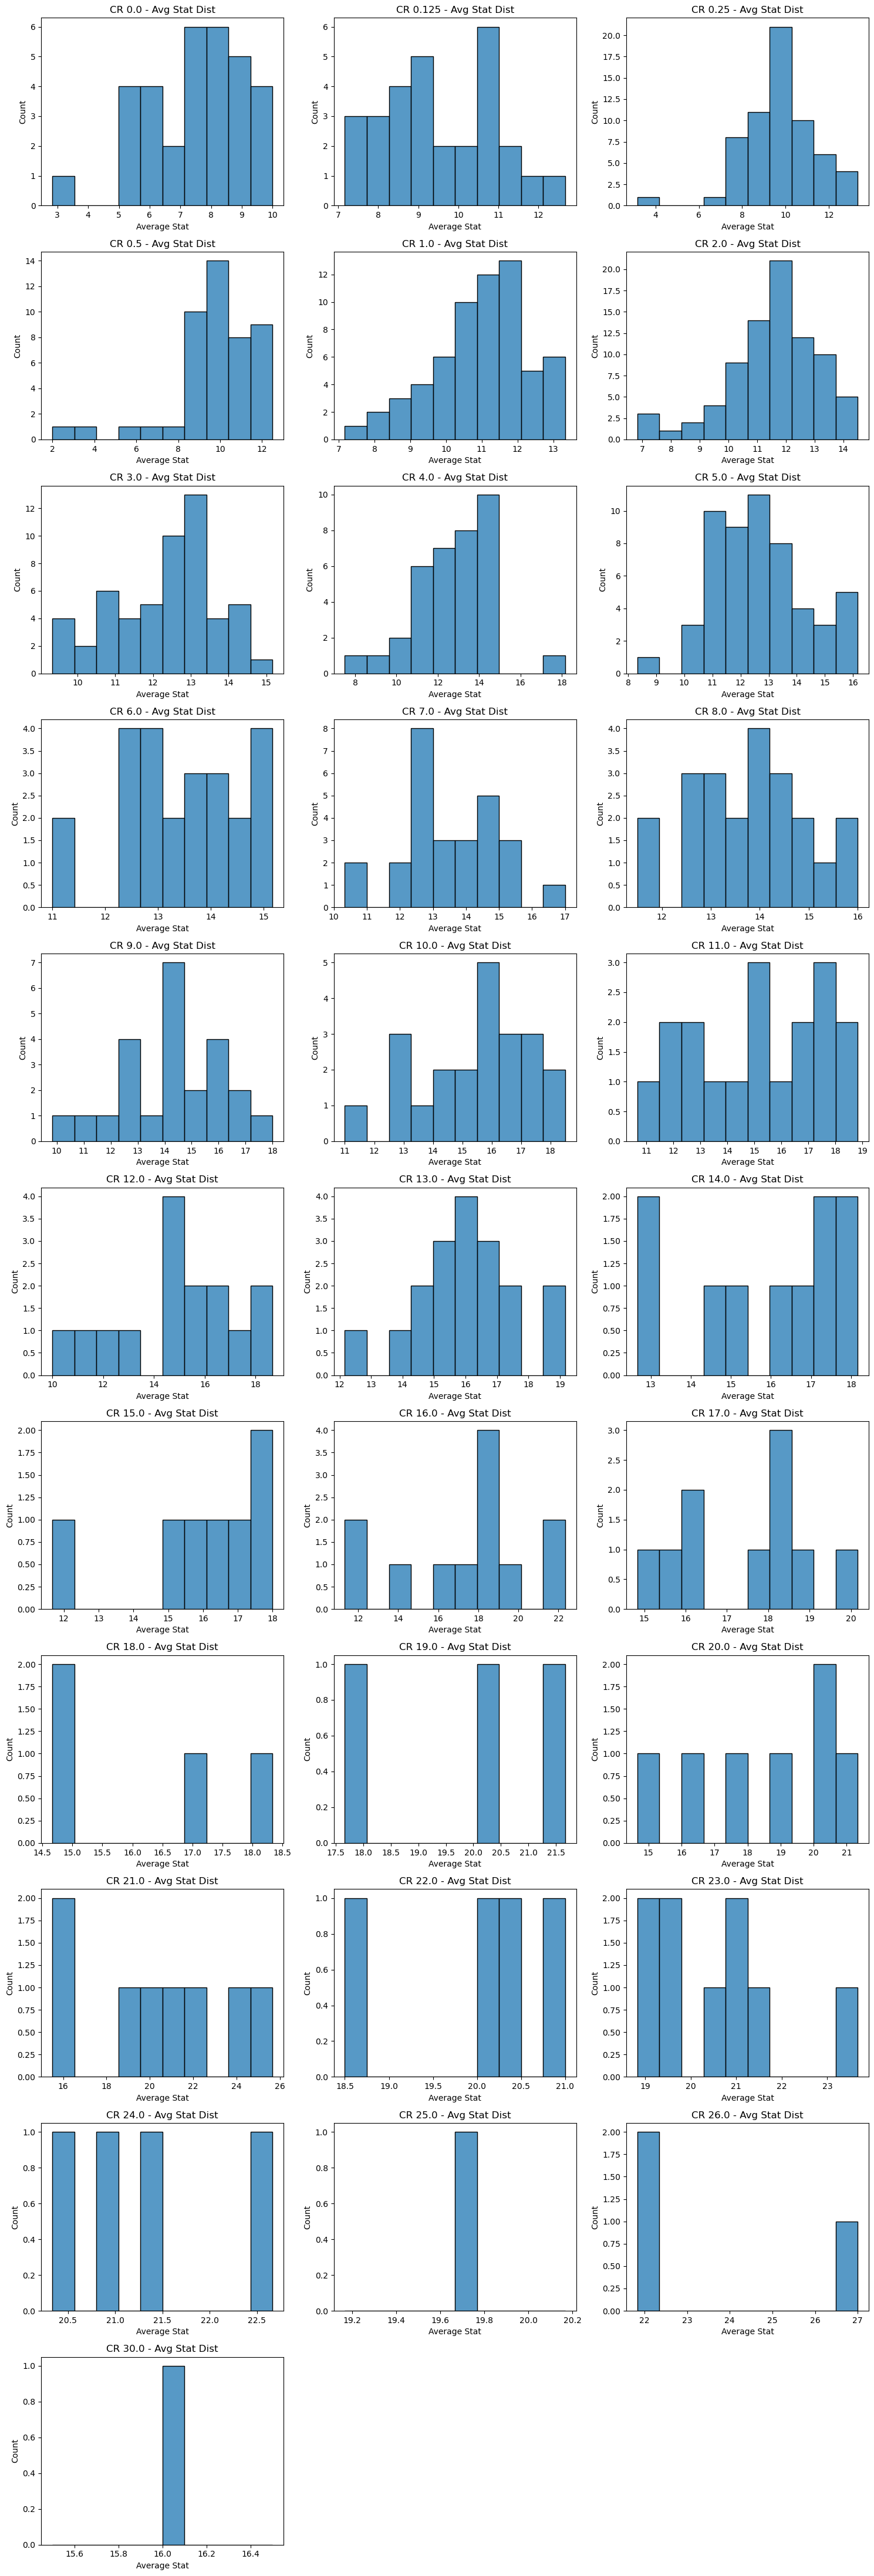

In [44]:
def plot_avg_stat_histograms_by_cr(df, cr_values=None, bins=10):
    """
    Plots histograms of average stat scores for each specified CR.
    
    Parameters:
        df (DataFrame): The monster dataset with str, dex, con, int, wis, cha.
        cr_values (list or None): List of CRs to plot. If None, uses all unique CRs sorted.
        bins (int): Number of bins in histogram.
    """
    # Calculate average stat if not already present
    if 'avg_stat' not in df.columns:
        df['avg_stat'] = df[['str', 'dex', 'con', 'int', 'wis', 'cha']].mean(axis=1)
    
    # Define which CRs to plot
    if cr_values is None:
        cr_values = sorted(df['cr'].dropna().unique())
    
    # Create subplots grid
    n = len(cr_values)
    ncols = 3
    nrows = (n + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 4 * nrows))
    axes = axes.flatten()

    for i, cr in enumerate(cr_values):
        subset = df[df['cr'] == cr]
        sns.histplot(subset['avg_stat'], bins=bins, kde=False, ax=axes[i])
        axes[i].set_title(f'CR {cr} - Avg Stat Dist')
        axes[i].set_xlabel('Average Stat')
        axes[i].set_ylabel('Count')
    
    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()
    
plot_avg_stat_histograms_by_cr(df)


## Threat Score

### Feature Engineering: Threat Score
The threat score is engineered to represent a monster's effective combat capability. It combines durability (HP and AC) with statistical power (average ability scores).

<AxesSubplot: xlabel='threat_score', ylabel='Count'>

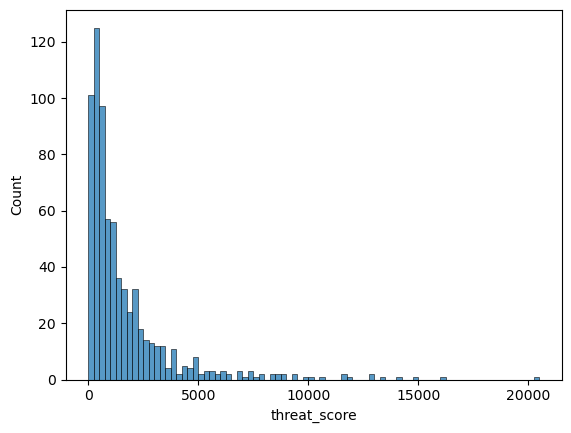

In [45]:
df['threat_score'] = df['avg_stat'] * (df['hp'] + df['ac']) * df['is_legendary'].apply(lambda x: 1.25 if x == 1 else 1)
sns.histplot(df['threat_score'], binwidth=250)


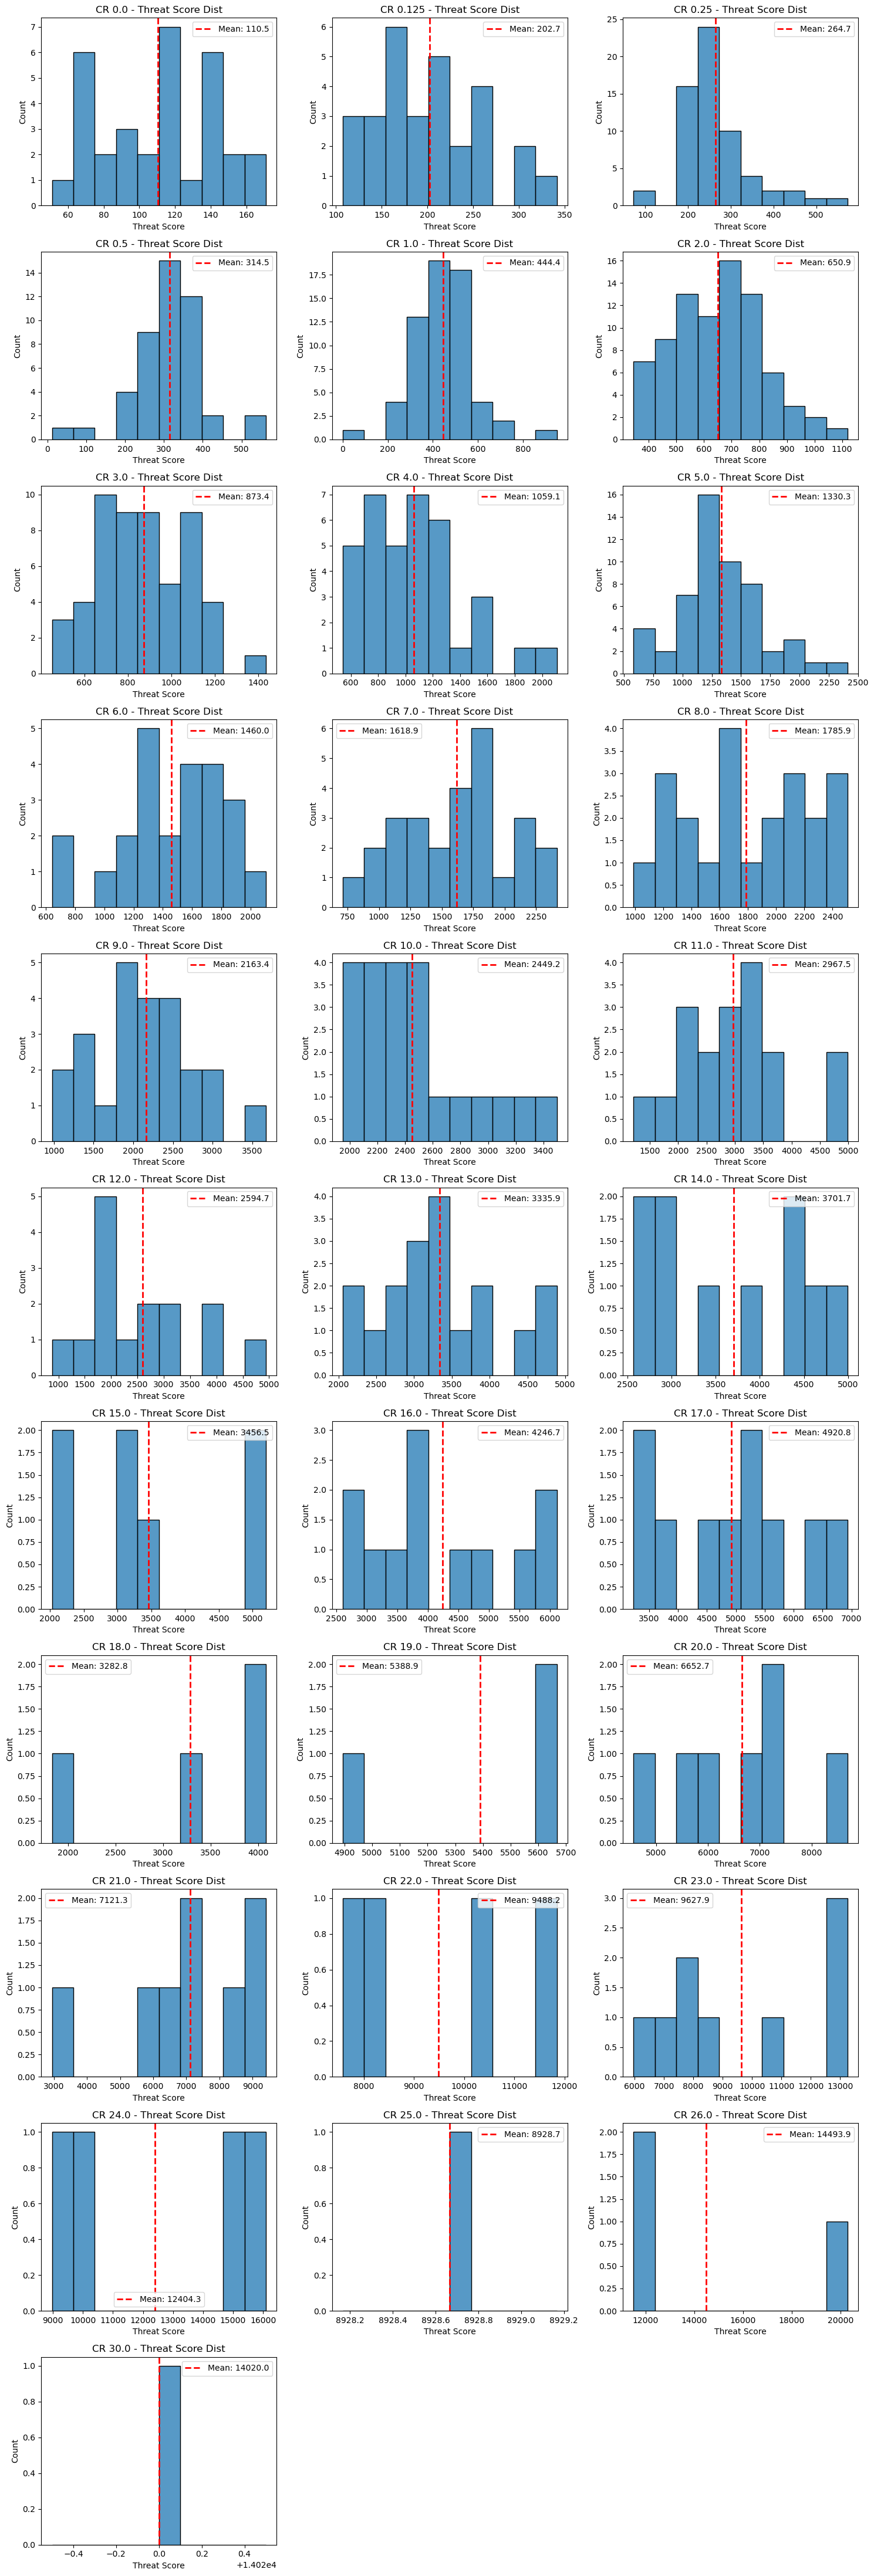

In [46]:
def plot_threat_score_histograms_by_cr(df, cr_values=None, bins=10):
    """
    Plots histograms of threat scores grouped by CR,
    with a vertical line for each CR's average threat score.
    
    Parameters:
        df (DataFrame): Must include 'threat_score' and 'cr' columns.
        cr_values (list or None): List of CRs to plot. If None, uses all unique CRs sorted.
        bins (int): Number of histogram bins.
    """
    if 'threat_score' not in df.columns:
        raise ValueError("DataFrame must contain 'threat_score' column.")
    
    if cr_values is None:
        cr_values = sorted(df['cr'].dropna().unique())
    
    n = len(cr_values)
    ncols = 3
    nrows = (n + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 4 * nrows))
    axes = axes.flatten()

    for i, cr in enumerate(cr_values):
        subset = df[df['cr'] == cr]
        ax = axes[i]
        
        # Plot histogram
        sns.histplot(subset['threat_score'], bins=bins, ax=ax, kde=False)
        
        # Add average line
        mean_score = subset['threat_score'].mean()
        ax.axvline(mean_score, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_score:.1f}')
        
        ax.set_title(f'CR {cr} - Threat Score Dist')
        ax.set_xlabel('Threat Score')
        ax.set_ylabel('Count')
        ax.legend()

    # Turn off unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()
    
plot_threat_score_histograms_by_cr(df)


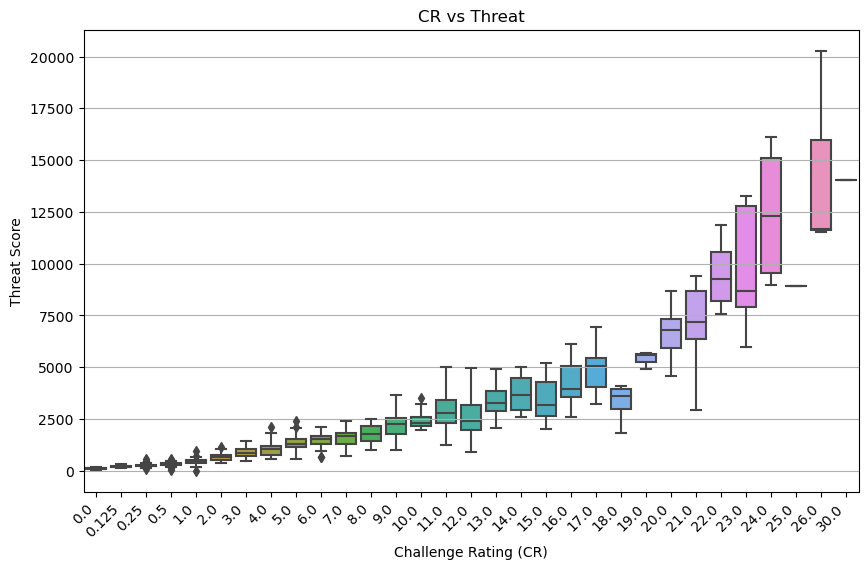

In [47]:
plt.figure(figsize=(10,6))
sns.boxplot(x='cr', y='threat_score', data=df)
plt.grid(visible=True, axis='y')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Challenge Rating (CR)')
plt.ylabel('Threat Score')
plt.title('CR vs Threat')
plt.show()

In [48]:
df.groupby('cr')['threat_score'].describe()


,count,mean,std,min,25%,50%,75%,max
cr,,,,,,,,
0.000,32.0,110.494792,32.291528,51.000000,84.791667,116.416667,136.875000,171.000000
0.125,29.0,202.689655,58.235934,107.500000,157.666667,189.000000,242.666667,341.333333
0.250,62.0,264.680108,81.347919,72.833333,218.875000,247.000000,290.250000,573.333333
0.500,46.0,314.452899,90.762529,12.000000,277.291667,319.000000,354.083333,562.500000
1.000,62.0,444.424731,138.356317,0.000000,372.333333,441.666667,505.875000,950.000000
2.000,81.0,650.907407,160.152735,345.000000,526.166667,655.500000,746.666667,1120.000000
3.000,54.0,873.373457,210.483869,451.500000,724.416667,849.500000,1046.500000,1435.500000
4.000,36.0,1059.097222,356.743742,541.333333,761.458333,1034.000000,1204.166667,2107.333333
5.000,54.0,1330.349537,364.642528,584.000000,1133.375000,1274.166667,1510.427083,2408.833333


Linear Model
y = 332.757x + -185.192
R² = 0.789

Quadratic Model
y = 14.933x² + 39.932x + 427.717
R² = 0.872



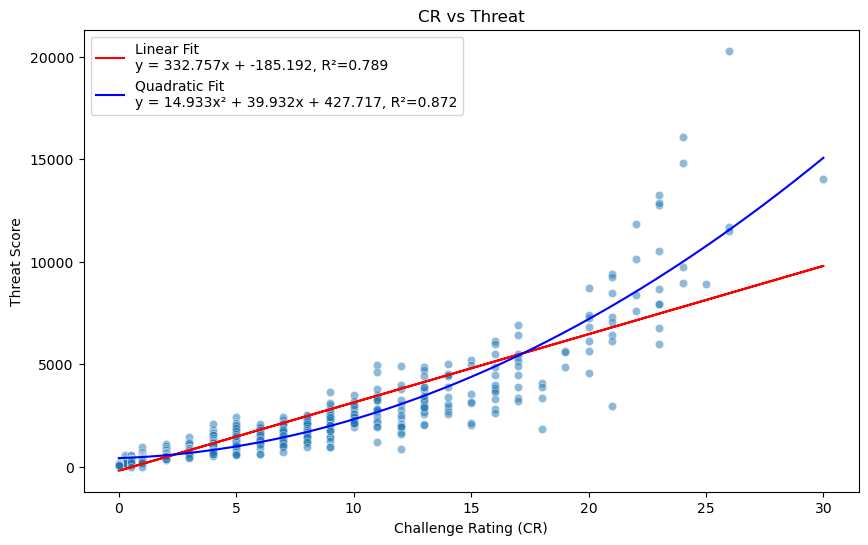

In [49]:
x = df['cr']
y = df['threat_score']

print('Linear Model')
(slope, intercept), eq, r2 = fit_model(df, 'cr', 'threat_score')
print(eq)
print(f"R² = {r2:.3f}", end='\n\n')

print('Quadratic Model')
quad_params, quad_eq, quad_r2 = fit_model(df, 'cr', 'threat_score', model='quadratic')
print(quad_eq)
print(f"R² = {quad_r2:.3f}", end='\n\n')

# Filter and sort x values for smooth curves
x_vals = np.linspace(df['cr'].min(), df['cr'].max(), 500)

# Quadratic predictions
a, b, c = quad_params
y_quad = a * x_vals**2 + b * x_vals + c


plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=y, alpha=0.5)
plt.plot(x, slope * x + intercept, color='red', label=f'Linear Fit\n{eq}, R²={r2:.3f}')
plt.plot(x_vals, y_quad, color='blue', label=f'Quadratic Fit\n{quad_eq}, R²={quad_r2:.3f}')
plt.legend()
plt.xlabel('Challenge Rating (CR)')
plt.ylabel('Threat Score')
plt.title('CR vs Threat')
plt.show()

# Deeper Insights
## Correlation Analysis

In [50]:
df[['cr', 'hp', 'ac', 'avg_stat', 'threat_score', 'str', 'dex', 'con', 'int', 'wis', 'cha']].corr()


,cr,hp,ac,avg_stat,threat_score,str,dex,con,int,wis,cha
cr,1.000000,0.926380,0.701578,0.827814,0.888536,0.631455,0.118485,0.786505,0.585904,0.615923,0.677921
hp,0.926380,1.000000,0.664352,0.774670,0.954234,0.711987,0.023997,0.839105,0.471107,0.515117,0.593221
ac,0.701578,0.664352,1.000000,0.704503,0.631692,0.530732,0.270235,0.618817,0.495110,0.459228,0.563252
avg_stat,0.827814,0.774670,0.704503,1.000000,0.791992,0.653128,0.307754,0.735757,0.798263,0.777288,0.887636
threat_score,0.888536,0.954234,0.631692,0.791992,1.000000,0.649389,0.089949,0.776669,0.516958,0.576891,0.647376
str,0.631455,0.711987,0.530732,0.653128,0.649389,1.000000,-0.174191,0.820693,0.199732,0.337467,0.356530
dex,0.118485,0.023997,0.270235,0.307754,0.089949,-0.174191,1.000000,-0.074904,0.279154,0.323429,0.281255
con,0.786505,0.839105,0.618817,0.735757,0.776669,0.820693,-0.074904,1.000000,0.327629,0.422467,0.475398
int,0.585904,0.471107,0.495110,0.798263,0.516958,0.199732,0.279154,0.327629,1.000000,0.622356,0.859989
wis,0.615923,0.515117,0.459228,0.777288,0.576891,0.337467,0.323429,0.422467,0.622356,1.000000,0.697338


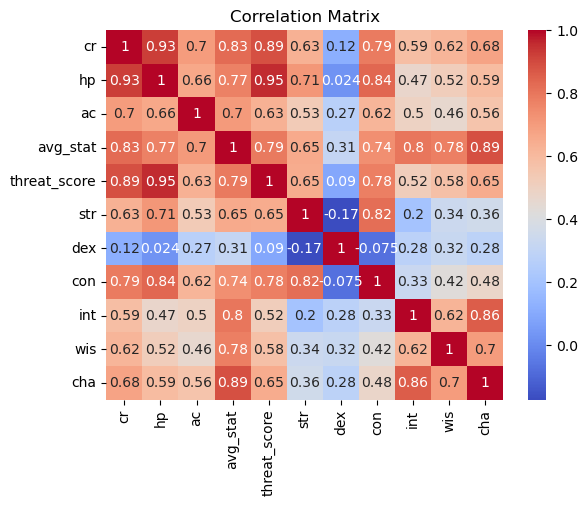

In [51]:
sns.heatmap(df[['cr', 'hp', 'ac', 'avg_stat', 'threat_score', 'str', 'dex', 'con', 'int', 'wis', 'cha']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Legendary Monsters
How do legendary monsters compare to ordinary monsters?

### Challenge Rating

<AxesSubplot: xlabel='is_legendary', ylabel='cr'>

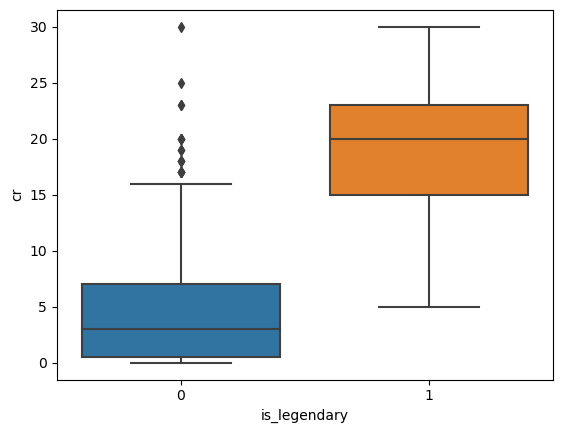

In [52]:
sns.boxplot(x='is_legendary', y='cr', data=df)

In [53]:
df.groupby('is_legendary')['cr'].describe()


,count,mean,std,min,25%,50%,75%,max
is_legendary,,,,,,,,
0,697.0,4.327654,4.814827,0.0,0.5,3.0,7.0,30.0
1,65.0,18.615385,4.801342,5.0,15.0,20.0,23.0,30.0


### Hit Points

<AxesSubplot: xlabel='is_legendary', ylabel='hp'>

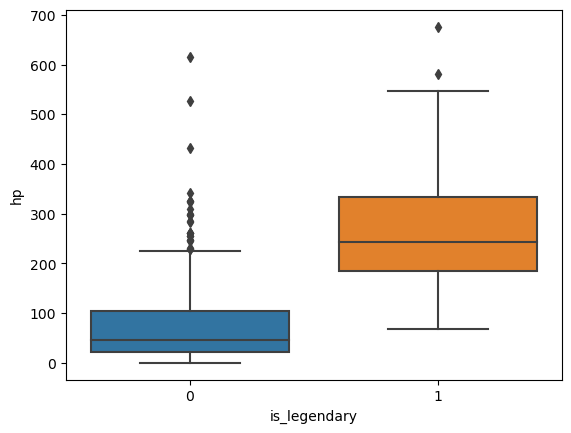

In [54]:
sns.boxplot(x='is_legendary', y='hp', data=df)

In [55]:
df.groupby('is_legendary')['hp'].describe()


,count,mean,std,min,25%,50%,75%,max
is_legendary,,,,,,,,
0,697.0,71.222382,70.454850,0.0,22.0,45.0,104.0,615.0
1,65.0,269.430769,128.190163,67.0,184.0,243.0,333.0,676.0


### Armor Class

<AxesSubplot: xlabel='is_legendary', ylabel='ac'>

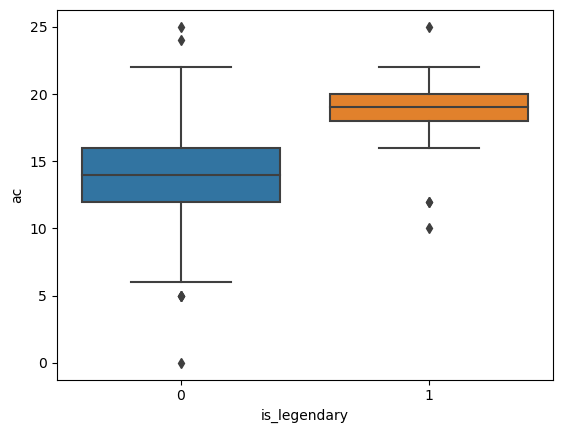

In [56]:
sns.boxplot(x='is_legendary', y='ac', data=df)

In [57]:
df.groupby('is_legendary')['ac'].describe()


,count,mean,std,min,25%,50%,75%,max
is_legendary,,,,,,,,
0,697.0,14.175036,2.884921,0.0,12.0,14.0,16.0,25.0
1,65.0,18.892308,2.469331,10.0,18.0,19.0,20.0,25.0


### Average Stat

<AxesSubplot: xlabel='is_legendary', ylabel='avg_stat'>

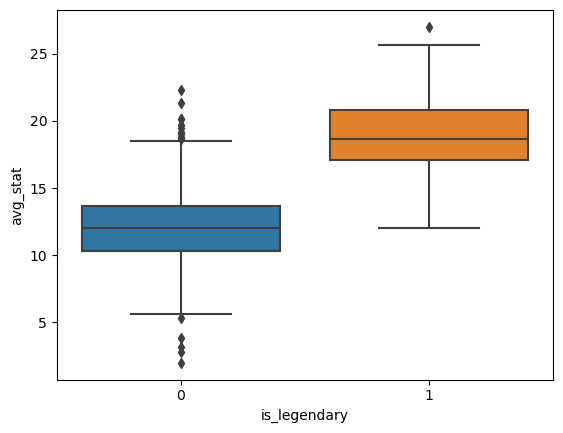

In [58]:
sns.boxplot(x='is_legendary', y='avg_stat', data=df)

In [59]:
df.groupby('is_legendary')['avg_stat'].describe()


,count,mean,std,min,25%,50%,75%,max
is_legendary,,,,,,,,
0,645.0,12.044186,2.789947,2.0,10.333333,12.000000,13.666667,22.333333
1,64.0,18.885417,2.803669,12.0,17.125000,18.666667,20.833333,27.000000


### Threat Score

<AxesSubplot: xlabel='is_legendary', ylabel='threat_score'>

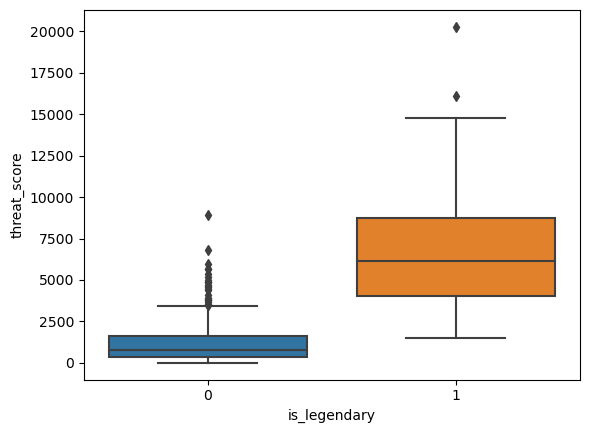

In [60]:
sns.boxplot(x='is_legendary', y='threat_score', data=df)

In [61]:
df.groupby('is_legendary')['threat_score'].describe()


,count,mean,std,min,25%,50%,75%,max
is_legendary,,,,,,,,
0,645.0,1146.647287,1114.769144,0.000000,351.333333,746.666667,1598.666667,8928.666667
1,64.0,7018.740234,3795.938841,1497.708333,4005.312500,6137.500000,8765.677083,20283.750000


### Misc

In [62]:
legendary = df[df['is_legendary'] == 1]
non_legendary = df[df['is_legendary'] == 0]

legendary_stats = legendary[['str', 'dex', 'con', 'int', 'wis', 'cha']].mean()
non_legendary_stats = non_legendary[['str', 'dex', 'con', 'int', 'wis', 'cha']].mean()

print('Legendary Average Stats')
print(legendary_stats, end='\n\n')
print('Non-legendary Average Stats')
print(non_legendary_stats)

Legendary Average Stats
str    23.171875
dex    13.968750
con    22.281250
int    16.500000
wis    17.515625
cha    19.875000
dtype: float64

Non-legendary Average Stats
str    14.289922
dex    13.162791
con    14.689922
int     8.677519
wis    11.646512
cha     9.798450
dtype: float64


In [63]:
legendary['type_main'].value_counts()

dragon         20
fiend          16
undead          6
monstrosity     5
aberration      5
celestial       4
elemental       4
humanoid        4
giant           1
Name: type_main, dtype: int64

# Use-Case Scenarios

<AxesSubplot: xlabel='cr'>

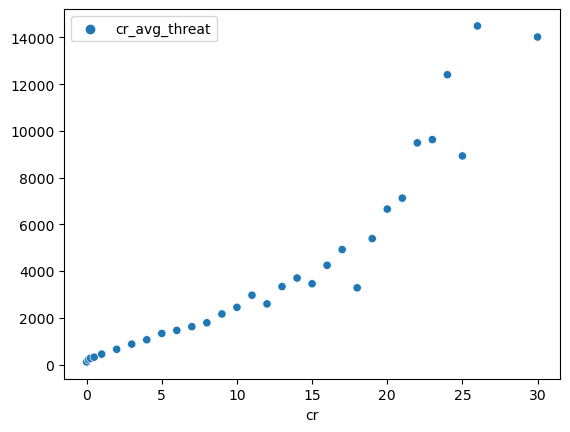

In [64]:
sns.scatterplot(df.groupby('cr')[['threat_score']].mean().rename(columns={'threat_score': 'cr_avg_threat'}))

Linear Fit: R² = 0.7895
Quadratic Fit: R² = 0.9405


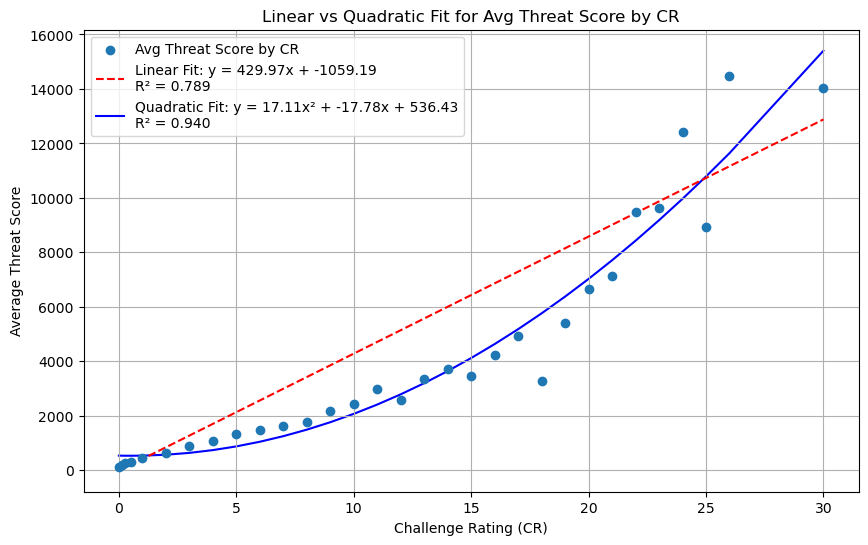

In [65]:
grouped = df.groupby('cr')[['threat_score']].mean().rename(columns={'threat_score': 'cr_avg_threat'}).reset_index()

x = grouped['cr'].values
y = grouped['cr_avg_threat'].values

# Fit a line
m, b_lin = np.polyfit(x, y, 1)
a, b, c = np.polyfit(x, y, 2)

# Predicted values for plotting
y_lin = m * x + b
y_quad = a * x**2 + b * x + c


# Total sum of squares
ss_tot = np.sum((y - np.mean(y)) ** 2)

# Linear R²
ss_res_lin = np.sum((y - y_lin) ** 2)
r2_lin = 1 - ss_res_lin / ss_tot

# Quadratic R²
ss_res_quad = np.sum((y - y_quad) ** 2)
r2_quad = 1 - ss_res_quad / ss_tot

print(f"Linear Fit: R² = {r2_lin:.4f}")
print(f"Quadratic Fit: R² = {r2_quad:.4f}")


plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Avg Threat Score by CR', zorder=3)
plt.plot(x, y_lin, color='red', linestyle='--', label=f'Linear Fit: y = {m:.2f}x + {b_lin:.2f}\nR² = {r2_lin:.3f}', zorder=2)
plt.plot(x, y_quad, color='blue', linestyle='-', label=f'Quadratic Fit: y = {a:.2f}x² + {b:.2f}x + {c:.2f}\nR² = {r2_quad:.3f}', zorder=1)

plt.xlabel('Challenge Rating (CR)')
plt.ylabel('Average Threat Score')
plt.title('Linear vs Quadratic Fit for Avg Threat Score by CR')
plt.legend()
plt.grid(True)
plt.show()

In [66]:
df['above_avg_threat'] = df['threat_score'] > df.groupby('cr')['threat_score'].transform('mean')

In [67]:
def suggest_monsters(df, party_level, top_n=5, include_legendary=False):
    # Estimate viable CR range
    min_cr = max(0, party_level - 1)
    max_cr = party_level + 1
    
    # Filter to CR range
    subset = df[(df['cr'] >= min_cr) & (df['cr'] <= max_cr)].copy()
    
    # Optionally filter legendary
    if not include_legendary:
        subset = subset[subset['is_legendary'] == 0]
    
    # Compare to average CR threat scores
    subset['cr_avg_threat'] = subset.groupby('cr')['threat_score'].transform('mean')
    subset = subset[subset['threat_score'] > subset['cr_avg_threat']]
    
    # Return by threat score
    return subset.sort_values(by='threat_score', ascending=False)[
        ['name', 'cr', 'threat_score', 'avg_stat', 'type_main']
    ]


In [68]:
suggested = suggest_monsters(df, party_level=1, top_n=5, include_legendary=False)
print(suggested)


                  name   cr  threat_score   avg_stat  type_main
562     bandit-captain  2.0   1120.000000  14.000000   humanoid
571            pegasus  2.0   1029.500000  14.500000  celestial
559          berserker  2.0    986.666667  12.333333   humanoid
641       kuo-toa-whip  1.0    950.000000  12.500000   humanoid
558       plesiosaurus  2.0    918.000000  11.333333      beast
..                 ...  ...           ...        ...        ...
745            octopus  0.0    117.500000   7.833333      beast
746                cat  0.0    116.666667   8.333333      beast
740               goat  0.0    116.666667   8.333333      beast
739  giant-fire-beetle  0.0    116.166667   6.833333      beast
748        cranium-rat  0.0    114.333333   8.166667      beast

[149 rows x 5 columns]


# Summary

## Save Summary

In [69]:
df[['name', 'cr', 'hp', 'ac', 'avg_stat', 'threat_score']].to_csv('monster_threat_summary.csv', index=False)

## Monster Suggester

In [70]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Create widgets
party_level_slider = widgets.IntSlider(value=5, min=1, max=20, description='Party Level:')
legendary_toggle = widgets.Checkbox(value=False, description='Include Legendary')

# Output area for results
output = widgets.Output()

# Callback function
def update_dashboard(change):
    with output:
        clear_output(wait=True)
        result = suggest_monsters(df, party_level=party_level_slider.value, include_legendary=legendary_toggle.value)
        display(result)

# Trigger update when values change
party_level_slider.observe(update_dashboard, names='value')
legendary_toggle.observe(update_dashboard, names='value')

# Display widgets
display(party_level_slider, legendary_toggle, output)

# Run initial display
update_dashboard(None)


Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


## Predict CR from Stats (Regression Model)

### Predictive Modeling: CR Estimation
A random forest regressor is trained to predict Challenge Rating based on engineered features. This model is later used to estimate CR for custom monsters.

In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Select features
features = ['hp', 'ac', 'avg_stat', 'threat_score', 'str', 'dex', 'con', 'int', 'wis', 'cha', 'is_legendary']
X = df[features]
y = df['cr']

# Drop rows with any NaNs in features or target
mask = X.notnull().all(axis=1) & y.notnull()
X = X[mask]
y = y[mask]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestRegressor().fit(X_train, y_train)


In [72]:
r2 = model.score(X_test, y_test)
print(f"R² on test set: {r2:.3f}")


R² on test set: 0.937


In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


MAE: 1.07
RMSE: 1.64


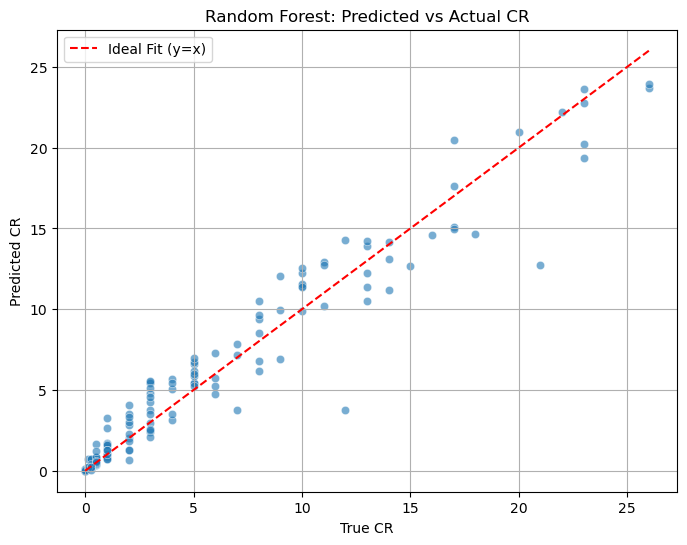

In [74]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit (y=x)')
plt.xlabel('True CR')
plt.ylabel('Predicted CR')
plt.title('Random Forest: Predicted vs Actual CR')
plt.legend()
plt.grid(True)
plt.show()


<AxesSubplot: title={'center': 'Feature Importances'}>

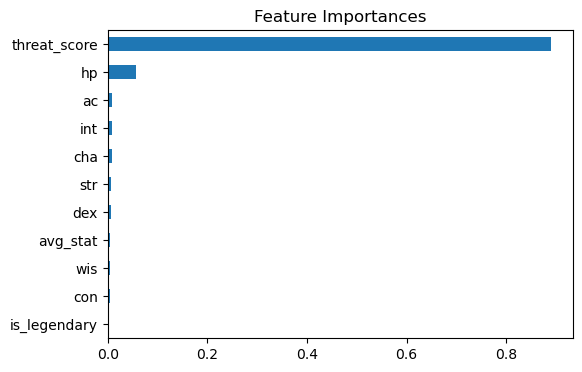

In [75]:
import pandas as pd

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(6, 4), title='Feature Importances')


In [76]:
custom = pd.DataFrame([{
    'hp': 100,
    'ac': 15,
    'avg_stat': 10,
    'threat_score': 1150,
    'str': 10,
    'dex': 10,
    'con': 10,
    'int': 10,
    'wis': 10,
    'cha': 10,
    'is_legendary': 0
}])
predicted_cr = model.predict(custom)
print(f"Estimated CR: {predicted_cr[0]:.1f}")


Estimated CR: 6.5


### Advanced Monster CR Estimator
This tool uses the random forest regressor in a dashboard format.

In [77]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Inputs
hp_input = widgets.IntText(value=100, description='HP:')
ac_input = widgets.IntText(value=15, description='AC:')
str_input = widgets.IntText(value=10, description='STR:')
dex_input = widgets.IntText(value=10, description='DEX:')
con_input = widgets.IntText(value=10, description='CON:')
int_input = widgets.IntText(value=10, description='INT:')
wis_input = widgets.IntText(value=10, description='WIS:')
cha_input = widgets.IntText(value=10, description='CHA:')
legendary_input = widgets.Checkbox(value=False, description='Legendary Monster?')
estimate_button = widgets.Button(description='Estimate CR')
cr_output = widgets.Output()

# Logic
def estimate_cr(btn):
    with cr_output:
        clear_output()
        
        # Collect input
        abilities = {
            'str': str_input.value,
            'dex': dex_input.value,
            'con': con_input.value,
            'int': int_input.value,
            'wis': wis_input.value,
            'cha': cha_input.value
        }
        avg_stat = sum(abilities.values()) / 6
        hp = hp_input.value
        ac = ac_input.value
        is_legendary = 1.25 if legendary_input.value else 1
        threat_score = avg_stat * (hp + ac) * is_legendary
        
        # Predict CR
        input_data = pd.DataFrame([{
            'hp': hp,
            'ac': ac,
            'avg_stat': avg_stat,
            'threat_score': threat_score,
            'str': str_input.value,
            'dex': dex_input.value,
            'con': con_input.value,
            'int': int_input.value,
            'wis': wis_input.value,
            'cha': cha_input.value,
            'is_legendary': legendary_input.value
        }])
        predicted_cr = model.predict(input_data)[0]
        predicted_cr_rounded = round(predicted_cr)

        # Display numeric results
        print(f"Threat Score: {threat_score:.0f}")
        print(f"Estimated Challenge Rating (CR): {predicted_cr:.1f}")

        # --- Plot Threat Score vs CR ---
        plt.figure(figsize=(8, 5))
        grouped = df.groupby('cr')['threat_score'].mean().reset_index()
        sns.lineplot(data=grouped, x='cr', y='threat_score', label='Average Threat Score')
        plt.axhline(threat_score, color='red', linestyle='--', label='Your Monster')
        plt.axvline(predicted_cr, color='gray', linestyle=':', label='Predicted CR')
        plt.title('Threat Score vs CR')
        plt.xlabel('CR')
        plt.ylabel('Average Threat Score')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # --- Compare with average monster at predicted CR ---
        if predicted_cr_rounded in df['cr'].values:
            cr_group = df[df['cr'] == predicted_cr_rounded]
            print("\nComparison to Average Monster at CR", predicted_cr_rounded)
            print(f" - Avg HP:         {cr_group['hp'].mean():.0f}")
            print(f" - Avg AC:         {cr_group['ac'].mean():.0f}")
            print(f" - Avg Stat:       {cr_group['avg_stat'].mean():.2f}")
            print(f" - Avg ThreatScore:{cr_group['threat_score'].mean():.0f}")
        else:
            print("\nNo monsters with CR =", predicted_cr_rounded, "in your dataset.")

# Bind to button
estimate_button.on_click(estimate_cr)

# Display widgets
display(widgets.VBox([
    widgets.HTML("<h3>Advanced Monster CR Estimator</h3>"),
    hp_input, ac_input,
    str_input, dex_input, con_input,
    int_input, wis_input, cha_input,
    legendary_input,
    estimate_button,
    cr_output
]))


Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.
